In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
    # for filename in filenames:
        # print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Loading**

In [3]:
ratings = pd.read_csv('/kaggle/input/amazon-books-reviews/Books_rating.csv')
books = pd.read_csv('/kaggle/input/amazon-books-reviews/books_data.csv')

In [4]:
ratings1 = ratings.copy()
books1 = books.copy()

In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [7]:
books.isnull().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [8]:
ratings.isnull().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

**Converting Columns names into Lowercase**

In [9]:
# Standardize column names: lowercase and replace spaces or slashes with underscores
ratings.columns = [col.lower().replace(' ', '_').replace('/', '_') for col in ratings.columns]

# Check
print(ratings.columns)

Index(['id', 'title', 'price', 'user_id', 'profilename', 'review_helpfulness',
       'review_score', 'review_time', 'review_summary', 'review_text'],
      dtype='object')


In [10]:
# Standardize column names: lowercase and replace spaces or slashes with underscores
books.columns = [col.lower().replace(' ', '_').replace('/', '_') for col in books.columns]

# Check
print(books.columns)

Index(['title', 'description', 'authors', 'image', 'previewlink', 'publisher',
       'publisheddate', 'infolink', 'categories', 'ratingscount'],
      dtype='object')


In [15]:
ratings.sample(50)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,title,price,user_id,profilename,review_helpfulness,review_score,review_time,review_summary,review_text
158820,0681994851,Jane Eyre,NaN,A1JUYF5D6TFFHB,"Rudy Avila ""Saint Seiya""",1/4,5.0,1076716800,The Bronte Masterpiece: The Best Edition,Written in 1847 by the woman writer Charlotte ...
1546547,0683303597,High-Yield Cell and Molecular Biology,NaN,A3K74WYBHF9JAO,Christopher Ryen,3/3,5.0,1266192000,Better than the newer edition,This book is much more concise than the new ed...
1206951,1578565812,The Mission of Motherhood: Touching Your Child...,10.19,A2LB4UPIJ2QTA6,Laurie from the Shire,2/3,4.0,1203033600,An encouraging challenge,This book is an encouragement to those of us w...
2603344,1858684064,The Complete Hacker's Handbook : Everything Yo...,NaN,A2270Y9NG9114T,"""amanda_b_gaywit""",6/19,1.0,972604800,Worst book ever...,Do not read this book. It is the worst book ev...
2101266,1587243938,The Tipping Point: How Little Things Can Make ...,NaN,A31I0CBSCOPRLK,"D. Stuart ""Researcher at Kudos""",6/8,5.0,1130457600,A big idea relevant to the networked world we ...,The Tipping Point is a fine book and highly re...
1649541,0965296822,Traveler's Guide to Alaskan Camping: Explore A...,NaN,AZ8CA4ZZZP0BM,Gramps,2/2,5.0,1308096000,Excellant source of information,After taking a trip on the Alaskan Railroad an...
1814157,0898869404,A Blistered Kind of Love: One Couple's Trial b...,NaN,AW0NPSFCST8LB,Patti,1/1,5.0,1335744000,Blistered Kind of Love:One Couple's Trial by T...,"Good, fun book to read if your into activities..."
393846,B000736OVO,A chance to cut is a chance to cure,NaN,A3HUC32W2DK0NI,kmultras,0/0,5.0,1355875200,One of the Must-Reads for every healthcare pro...,I was introduced to this one at UT Southwester...
1590407,B000HYTF96,I know this much is true,NaN,NaN,NaN,0/0,5.0,923529600,One of my all time favorites,This book is one of the best I've ever read. I...
2681803,0155105159,Anthropology,NaN,A2V92XYOCL5DFT,Mario R. Corbin,0/0,5.0,1331424000,William Haviland Quality Textbook - Anthropology,As a student I found previous editions of this...


In [18]:
ratings['user_id'].nunique()

1008972

In [19]:
ratings['user_id'].value_counts().sum()

2438213

In [14]:
books.sample(50)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,title,description,authors,image,previewlink,publisher,publisheddate,infolink,categories,ratingscount
135791,The Pennsylvania Dutch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189983,Microsoft Visual C++ (Microsoft Professional E...,Get up to speed on Application Lifecycle Manag...,"['Mickey Gousset', 'Brian Keller', 'Ajoy Krish...",http://books.google.com/books/content?id=1ld-a...,http://books.google.com/books?id=1ld-aO7Z7LIC&...,John Wiley & Sons,2010-05-21,http://books.google.com/books?id=1ld-aO7Z7LIC&...,['Computers'],NaN
44124,The New Jersey Devils' Road to the 2003 Stanle...,Examines the players and opponents involved in...,['Associated Press'],http://books.google.com/books/content?id=Mf_Jn...,http://books.google.com/books?id=Mf_JnvtE8YwC&...,Sports Publishing LLC,2003,http://books.google.com/books?id=Mf_JnvtE8YwC&...,['Sports & Recreation'],NaN
211455,Ancient Secret of the Fountain of Youth Cookbo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16288,Assessment of Cognitive Processes: The PASS Th...,In eleven comprehensive chapters the authors p...,"['Jagannath Prasad Das', 'Jack A. Naglieri', '...",http://books.google.com/books/content?id=PpN9A...,http://books.google.nl/books?id=PpN9AAAAMAAJ&q...,Allyn & Bacon,1994,http://books.google.nl/books?id=PpN9AAAAMAAJ&d...,['Education'],NaN
140735,Child of the Morning (Hera),"Rather than have his beloved daughter, the hig...",['Pauline Gedge'],http://books.google.com/books/content?id=2Eo_N...,http://books.google.com/books?id=2Eo_NwAACAAJ&...,Soho PressInc,1977,http://books.google.com/books?id=2Eo_NwAACAAJ&...,['Fiction'],7.0
180310,Black Bart: The True Story of the West's Most ...,Relates the story of the mysterious nineteenth...,"['William Collins', 'Bruce Levene']",NaN,http://books.google.com/books?id=jI3kPQAACAAJ&...,NaN,1992,http://books.google.com/books?id=jI3kPQAACAAJ&...,['Brigands and robbers'],NaN
54062,Red Are the Apples,Leads the reader through a bountiful vegetable...,"['Marc Harshman', 'Cheryl Ryan']",http://books.google.com/books/content?id=1p89x...,http://books.google.com/books?id=1p89x_2QYtMC&...,Houghton Mifflin Harcourt,2007,http://books.google.com/books?id=1p89x_2QYtMC&...,['Juvenile Fiction'],NaN
154776,Happy Hats & Cool Caps: To Sew for the Whole F...,Boys and girls alike will be stepping out in s...,['Kristi Simpson'],http://books.google.com/books/content?id=xIfiC...,http://books.google.com/books?id=xIfiCgAAQBAJ&...,Annie's Wholesale,2015-12-09,https://play.google.com/store/books/details?id...,['Crafts & Hobbies'],NaN
140028,Mist Upon The Pond,Mist Upon the Pond is a collection of the auth...,['Sandra E. McBride'],http://books.google.com/books/content?id=SS1L0...,http://books.google.com/books?id=SS1L05-EfAsC&...,Dog Ear Publishing,2005-11-01,https://play.google.com/store/books/details?id...,['Poetry'],NaN


**Creating review date column by timestemp**

In [20]:
ratings["reviewdate"] = pd.to_datetime(ratings["review_time"], unit="s")

In [21]:
ratings.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,title,price,user_id,profilename,review_helpfulness,review_score,review_time,review_summary,review_text,reviewdate
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,1999-10-23
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,2004-09-21
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",2004-03-09
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",2004-07-25
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,2005-02-10


**Converting items of title feature of ratings dataset in lowercase**

In [22]:
ratings['title'] = ratings['title'].str.lower().fillna("")

In [23]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   id                  object        
 1   title               object        
 2   price               float64       
 3   user_id             object        
 4   profilename         object        
 5   review_helpfulness  object        
 6   review_score        float64       
 7   review_time         int64         
 8   review_summary      object        
 9   review_text         object        
 10  reviewdate          datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 251.8+ MB


**Sorting our rating dataset by review_time feature**

In [24]:
ratings = ratings.sort_values(by="review_time", ascending=True)

In [25]:
ratings.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,title,price,user_id,profilename,review_helpfulness,review_score,review_time,review_summary,review_text,reviewdate
2846063,1580498051,"a tale of two cities, literary touchstone edition",NaN,A6L9KOTK81C0X,T. Ha,0/0,5.0,1362355200,Free classics for the kindle!,"Well, you can't go wrong with kindle stream lo...",2013-03-04
310909,006014713X,"inanna, queen of heaven and earth: her stories...",NaN,A1SBN1K69NE4M1,aimee,0/0,3.0,1362355200,Descent of Inanna,"The Descent of InannaIn the Descent of Inanna,...",2013-03-04
203132,B000FTCJIW,kim,NaN,A2IV9VT57ODCXK,friedel paur,0/0,5.0,1362355200,old but true,I always loved reading Kim - now for the first...,2013-03-04
2389710,0312253850,faraday's popcorn factory,NaN,A3IUWES9VMDQIO,ncwrayray,0/0,5.0,1362355200,Great Book,This book is a real page turner! The story of ...,2013-03-04
788484,1580495974,a tale of two cities - literary touchstone edi...,5.99,A6L9KOTK81C0X,T. Ha,0/0,5.0,1362355200,Free classics for the kindle!,"Well, you can't go wrong with kindle stream lo...",2013-03-04


In [26]:
books.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,title,description,authors,image,previewlink,publisher,publisheddate,infolink,categories,ratingscount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


# **Converting into lowercase of all items of title feature of books dataset**

In [28]:
books['title'] =  books['title'].str.lower().fillna("")

**Find out all published date of books and sort the data by published date (not original dataset)**

In [29]:
books['publisheddate'] = pd.to_datetime(books['publisheddate'], errors='coerce')

books_sorted = books.sort_values(by='publisheddate')

# Step 3: Reset index for clean output
books_sorted = books_sorted.reset_index(drop=True)

# Display first 10 rows
print(books_sorted[['title', 'publisheddate']].head(10))

                                               title publisheddate
0  langhorn & mary: a 19th century american love ...    1679-01-01
1  making better environmental decisions: an alte...    1680-01-01
2                          the life of st. augustine    1680-01-01
3                                  cormorant's brood    1681-01-01
4   race to the tower of power (backyardigans (8x8))    1682-01-01
5  the works of the late learned divine stephen c...    1684-01-01
6                                 not so noble tales    1684-01-01
7                                              herma    1687-01-01
8                                               love    1690-01-01
9                                    love & betrayal    1690-01-01


In [30]:
print(books_sorted[['title', 'publisheddate']].tail(10))

                                                    title publisheddate
212394                               the genesis protocol           NaT
212395                                       final things           NaT
212396          essential guide to hawaii, the big island           NaT
212397                                              sofia           NaT
212398  the magic of the soul: applying spiritual powe...           NaT
212399               autodesk inventor 10 essentials plus           NaT
212400  the orphan of ellis island (time travel advent...           NaT
212401                                              mamaw           NaT
212402                                  the autograph man           NaT
212403  student's solutions manual for johnson/mowry's...           NaT


In [31]:
books_sorted_valid = books_sorted.dropna(subset=['publisheddate'])

print(books_sorted_valid[['title', 'publisheddate']].tail(10))

                                                   title publisheddate
90941  the standard deviants - habla espanol (learn s...    2022-01-01
90942  red over black: black slavery among the cherok...    2022-01-01
90943                                      living corpse    2022-01-01
90944                      the mysteries of christianity    2022-01-01
90945                                     savage journey    2022-01-01
90946                   genghis khan (makers of history)    2022-01-01
90947                              god, the devil and me    2022-01-01
90948             shadow on the sand (lone wolf, book 5)    2022-01-01
90949                                          kota mama    2025-01-01
90950                     brother cadfael's book of days    2025-01-01


**Find out all the books which has published date between 1900 - 2025**

In [32]:
# Step 1: Convert 'publisheddate' to datetime, coerce errors to NaT
books['publisheddate'] = pd.to_datetime(books['publisheddate'], errors='coerce')

# Step 2: Sort by the original 'publisheddate' column
books_sorted = books.sort_values(by='publisheddate')

# Step 3: Reset index for clean output
books_sorted = books_sorted.reset_index(drop=True)

# Step 4: Remove rows with invalid or missing publication dates
books_sorted_valid = books_sorted.dropna(subset=['publisheddate'])

# Step 5: Optional — filter out unrealistic years (e.g., before 1900 or after 2025)
books_sorted_valid = books_sorted_valid[
    books_sorted_valid['publisheddate'].dt.year.between(1900, 2025)
]

# Step 6: Display first 10 rows
print("First 10 valid books:")
print(books_sorted_valid[['title', 'publisheddate']].head(10))

# Step 7: Display last 10 rows
print("\nLast 10 valid books:")
print(books_sorted_valid[['title', 'publisheddate']].tail(10))


First 10 valid books:
                                                  title publisheddate
3227  great pictures as seen and described by famous...    1900-01-01
3228  in a manner of speaking: accents of the englis...    1900-01-01
3229                allan quartermain (electric series)    1900-01-01
3230  the history of ancient rome (the great courses...    1900-01-01
3231  malay magic;: being an introduction to the fol...    1900-01-01
3232                    the return of bull dog drummond    1900-01-01
3233                                   a nugget of gold    1900-01-01
3234  contending forces: a romance illustrative of n...    1900-01-01
3235  the light of asia;: or, the great renunciation...    1900-01-01
3236          upgrading and repairing microsoft windows    1900-01-01

Last 10 valid books:
                                                   title publisheddate
90941  the standard deviants - habla espanol (learn s...    2022-01-01
90942  red over black: black slavery among t

In [33]:
books_sorted_valid

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,title,description,authors,image,previewlink,publisher,publisheddate,infolink,categories,ratingscount
3227,great pictures as seen and described by famous...,NaN,['Esther Singleton'],http://books.google.com/books/content?id=TkESA...,http://books.google.com/books?id=TkESAwAAQBAJ&...,Рипол Классик,1900-01-01,https://play.google.com/store/books/details?id...,['History'],NaN
3228,in a manner of speaking: accents of the englis...,NaN,['John Christopher Wells'],NaN,http://books.google.nl/books?id=94UZtAEACAAJ&d...,NaN,1900-01-01,http://books.google.nl/books?id=94UZtAEACAAJ&d...,NaN,NaN
3229,allan quartermain (electric series),NaN,['Henry Rider Haggard'],NaN,http://books.google.com/books?id=eJedzgEACAAJ&...,NaN,1900-01-01,http://books.google.com/books?id=eJedzgEACAAJ&...,['Adventure stories'],6.0
3230,the history of ancient rome (the great courses...,NaN,['Henry Osborn Taylor'],http://books.google.com/books/content?id=lCHAo...,http://books.google.com/books?id=lCHAoevOP_gC&...,NaN,1900-01-01,https://play.google.com/store/books/details?id...,['Civilization'],NaN
3231,malay magic;: being an introduction to the fol...,NaN,['Walter William Skeat'],http://books.google.com/books/content?id=ETdJA...,http://books.google.com/books?id=ETdJAAAAMAAJ&...,NaN,1900-01-01,https://play.google.com/store/books/details?id...,"['Folk literature, Malay']",NaN
...,...,...,...,...,...,...,...,...,...,...
90946,genghis khan (makers of history),NaN,['Jacob Abbott'],NaN,http://books.google.com/books?id=gQPezgEACAAJ&...,NaN,2022-01-01,http://books.google.com/books?id=gQPezgEACAAJ&...,NaN,NaN
90947,"god, the devil and me",In this unique and highly entertaining autobio...,['Alf Taylor'],http://books.google.com/books/content?id=GZpCz...,http://books.google.nl/books?id=GZpCzwEACAAJ&d...,NaN,2022-01-01,http://books.google.nl/books?id=GZpCzwEACAAJ&d...,['Aboriginal Australians'],NaN
90948,"shadow on the sand (lone wolf, book 5)",NaN,['JOE. DEVER'],NaN,http://books.google.com/books?id=Lmc-zwEACAAJ&...,NaN,2022-01-01,http://books.google.com/books?id=Lmc-zwEACAAJ&...,NaN,NaN
90949,kota mama,NaN,['JOHN BLASHFORD-SNELL. RICHARD SNAILHAM.'],NaN,http://books.google.com/books?id=7GxszgEACAAJ&...,NaN,2025-01-01,http://books.google.com/books?id=7GxszgEACAAJ&...,NaN,NaN


**Analysis on one books review**

In [34]:
book_title = "a tale of two cities, literary touchstone edition"

# Get all review times for that book
review_times = ratings.loc[ratings["title"] == book_title, "reviewdate"]
review_times = pd.to_datetime(review_times)
review_times_sorted = review_times.sort_values()

In [35]:
review_times

2846075   1996-06-20
2845984   1997-02-15
2845983   1997-03-08
2845982   1997-05-11
2845981   1997-08-02
             ...    
2846067   2013-03-02
2846064   2013-03-03
2846065   2013-03-03
2846066   2013-03-03
2846063   2013-03-04
Name: reviewdate, Length: 985, dtype: datetime64[ns]

In [36]:
review_times.info()

<class 'pandas.core.series.Series'>
Index: 985 entries, 2846075 to 2846063
Series name: reviewdate
Non-Null Count  Dtype         
--------------  -----         
985 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.4 KB


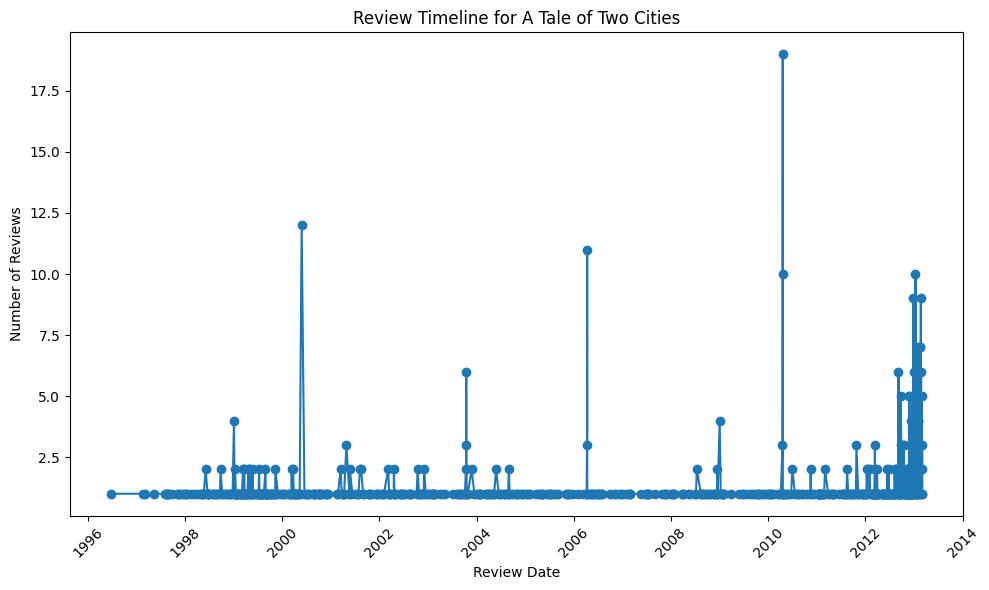

In [37]:
import matplotlib.pyplot as plt

# Count reviews per date
review_counts = review_times_sorted.value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
plt.plot(review_counts.index, review_counts.values, marker="o", linestyle="-")
plt.xlabel("Review Date")
plt.ylabel("Number of Reviews")
plt.title("Review Timeline for A Tale of Two Cities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


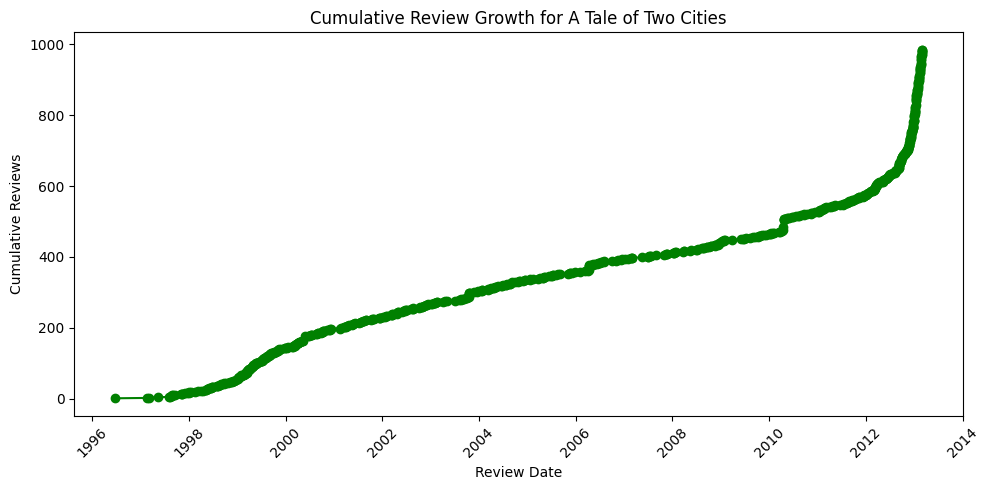

In [38]:
# Cumulative sum of reviews
cumulative_reviews = review_counts.cumsum()

plt.figure(figsize=(10,5))
plt.plot(cumulative_reviews.index, cumulative_reviews.values, marker="o", linestyle="-", color="green")
plt.xlabel("Review Date")
plt.ylabel("Cumulative Reviews")
plt.title("Cumulative Review Growth for A Tale of Two Cities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Find out in books dataset rating cout feature is not containg right entries**

In [39]:
ratings[ratings['title'] == 'great jewish women']

,id,title,price,user_id,profilename,review_helpfulness,review_score,review_time,review_summary,review_text,reviewdate
190051,0824603702,great jewish women,20.32,NaN,NaN,11/17,5.0,957830400,A great gift for Jewish Women,This book makes a great graduation gift or oth...,2000-05-09
190047,0824603702,great jewish women,20.32,A2BW6T6MTQ6T4G,J. Kingan,20/24,1.0,1049673600,Great?,While there are some genuinely great Jewish wo...,2003-04-07
190046,0824603702,great jewish women,20.32,AHD101501WCN1,"Shalom Freedman ""Shalom Freedman""",13/14,4.0,1109203200,Much good work but not enough emphasis on Jewi...,This book has a great amount of commendable ma...,2005-02-24
190048,0824603702,great jewish women,20.32,A1AUVKQMHW6OWE,Phyllis Greenspan,1/1,5.0,1253318400,"Great Review for ""Great Jewish Women""",I have been giving this as a Bat Mitzvah gift ...,2009-09-19
190050,0824603702,great jewish women,20.32,AS5QPIXLUUT9D,A. R. Goldstein,0/0,4.0,1329177600,Great,This work gives biographies of some outstandin...,2012-02-14
190049,0824603702,great jewish women,20.32,AX5OHPCLSFKQO,Learning Mom,0/0,5.0,1358380800,Fabulous book,Uplifting book about Jewish women who have lea...,2013-01-17


In [40]:
books[books['title']=='great jewish women']

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,title,description,authors,image,previewlink,publisher,publisheddate,infolink,categories,ratingscount
13103,great jewish women,From the biblical Deborah to U.S. Supreme Cour...,['Robert Slater'],http://books.google.com/books/content?id=oR_4r...,http://books.google.nl/books?id=oR_4rVfE438C&d...,Jonathan David Pub,1994-01-01,http://books.google.nl/books?id=oR_4rVfE438C&d...,['Biography & Autobiography'],NaN


In [41]:
ratings.columns

Index(['id', 'title', 'price', 'user_id', 'profilename', 'review_helpfulness',
       'review_score', 'review_time', 'review_summary', 'review_text',
       'reviewdate'],
      dtype='object')

In [42]:
books.columns

Index(['title', 'description', 'authors', 'image', 'previewlink', 'publisher',
       'publisheddate', 'infolink', 'categories', 'ratingscount'],
      dtype='object')

**Lowercase into all categories of books dataset**

In [43]:
import ast

def safe_literal_eval(x):
    if isinstance(x, str):
        try:
            if x.strip() in ['', 'NaN', 'None', 'nan']:
                return []
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            if ',' in x:
                return [item.strip() for item in x.split(',')]
            return [x.strip()]
    elif isinstance(x, list):
        return x
    else:
        return []

books['categories'] = books['categories'].apply(safe_literal_eval)
books['categories'] = books['categories'].apply(
    lambda x: [cat.lower().strip() for cat in x] if isinstance(x, list) and x else x
)

In [44]:
ratings.columns

Index(['id', 'title', 'price', 'user_id', 'profilename', 'review_helpfulness',
       'review_score', 'review_time', 'review_summary', 'review_text',
       'reviewdate'],
      dtype='object')

In [45]:
books['categories'].value_counts()

categories
[]                                      41199
[fiction]                               23470
[religion]                               9471
[history]                                9347
[juvenile fiction]                       6671
                                        ...  
[enneagram]                                 1
[poplar]                                    1
[career guidance]                           1
[killington peak (vt.)]                     1
[flame in the wind (motion picture)]        1
Name: count, Length: 10808, dtype: int64

**Findout how many Categories has only 1 book**

In [46]:
# Count how many books are in each category
category_counts = books['categories'].value_counts()

# Find categories with fewer than 10 books
rare_categories = category_counts[category_counts < 2]

print(f"Number of categories with fewer than 2 books: {len(rare_categories)}")
print("\nThese categories are:\n", rare_categories)

Number of categories with fewer than 2 books: 6494

These categories are:
 categories
[mental suggestion.]                    1
[aquatic plants]                        1
[choral singing]                        1
[dien-bien-phu]                         1
[dogma]                                 1
                                       ..
[enneagram]                             1
[poplar]                                1
[career guidance]                       1
[killington peak (vt.)]                 1
[flame in the wind (motion picture)]    1
Name: count, Length: 6494, dtype: int64


' Great Jewish Women ' This Book has NAN rating Counts in Books dataset but in rating dataset there are 5 rating counts so this two datasets are mismatching.

**Find out how many books which has only number rating is one**

In [47]:
ratings.columns

Index(['id', 'title', 'price', 'user_id', 'profilename', 'review_helpfulness',
       'review_score', 'review_time', 'review_summary', 'review_text',
       'reviewdate'],
      dtype='object')

In [48]:
# Count how many books are in each category
ratings_counts = ratings['title'].value_counts()

# Find categories with fewer than 10 books
rare_ratings = ratings_counts[ratings_counts < 2]

print(f"Number of books with fewer than 2 ratings: {len(rare_ratings)}")
print("\nThese  books are:\n", rare_ratings)

Number of books with fewer than 2 ratings: 63553

These  books are:
 title
for a special teenager: a collection of poems (teens & young adults)                                           1
beginnings: a study of the call of god in genesis                                                              1
later scots-irish links, 1725-1825. part two                                                                   1
consider the lemming                                                                                           1
elements of newtonian mechanics.                                                                               1
                                                                                                              ..
succulent and xerophytic plants of madagascar, vol. 2                                                          1
gustave baumann pocket address book                                                                            1
praying with dominic 

In [49]:
ratings.columns

Index(['id', 'title', 'price', 'user_id', 'profilename', 'review_helpfulness',
       'review_score', 'review_time', 'review_summary', 'review_text',
       'reviewdate'],
      dtype='object')

In [50]:
books['title']

0                            its only art if its well hung!
1                                  dr. seuss: american icon
2                     wonderful worship in smaller churches
3                             whispers of the wicked saints
4         nation dance: religion, identity and cultural ...
                                ...                        
212399    the orphan of ellis island (time travel advent...
212400                              red boots for christmas
212401                                                mamaw
212402                                    the autograph man
212403    student's solutions manual for johnson/mowry's...
Name: title, Length: 212404, dtype: object

In [51]:
ratings['title']

2971452                                       silver pennies
2971449                                       silver pennies
2971448                                       silver pennies
2971447                                       silver pennies
2971446                                       silver pennies
                                 ...                        
2846063    a tale of two cities, literary touchstone edition
310909     inanna, queen of heaven and earth: her stories...
203132                                                   kim
2389710                            faraday's popcorn factory
788484     a tale of two cities - literary touchstone edi...
Name: title, Length: 3000000, dtype: object

In [52]:
from datetime import datetime, timedelta
import requests

In [53]:
books.columns

Index(['title', 'description', 'authors', 'image', 'previewlink', 'publisher',
       'publisheddate', 'infolink', 'categories', 'ratingscount'],
      dtype='object')

**Calculating number of raings and then merge with books dataset**

In [54]:
ratings.columns

Index(['id', 'title', 'price', 'user_id', 'profilename', 'review_helpfulness',
       'review_score', 'review_time', 'review_summary', 'review_text',
       'reviewdate'],
      dtype='object')

In [55]:
# Calculate rating counts from the ratings dataset using titles
rating_counts = ratings.groupby('title').size().reset_index(name='ratings_count')

print("Rating counts sample:")
print(rating_counts.head())
print(f"Total unique books in ratings: {len(rating_counts)}")

# Merge with books dataset using titles
books = books.merge(rating_counts, on='title', how='left')

# Fill NaN values with 0 for books without ratings
books['ratings_count'] = books['ratings_count'].fillna(0).astype(int)

# Verify the results
print(f"\nMerge results:")
print(f"Total books: {len(books)}")
print(f"Books with ratings: {len(books[books['ratings_count'] > 0])}")
print(f"Books without ratings: {len(books[books['ratings_count'] == 0])}")

# Show some books with their rating counts
print("\nSample books with rating counts:")
print(books[['title', 'ratings_count']].head(10))

# Show books with the highest ratings
if len(books[books['ratings_count'] > 0]) > 0:
    print("\nTop 10 books by number of ratings:")
    top_books = books[books['ratings_count'] > 0].nlargest(10, 'ratings_count')[['title', 'ratings_count']]
    print(top_books)

Rating counts sample:
                                               title  ratings_count
0                                                               208
1           " film technique, " and, " film acting "              2
2  " we'll always have paris": the definitive gui...              2
3  "... and poetry is born ..." russian classical...              1
4  "a careless word, a needless sinking": a histo...              2
Total unique books in ratings: 209457

Merge results:
Total books: 212404
Books with ratings: 212404
Books without ratings: 0

Sample books with rating counts:
                                               title  ratings_count
0                     its only art if its well hung!              1
1                           dr. seuss: american icon              9
2              wonderful worship in smaller churches              4
3                      whispers of the wicked saints             32
4  nation dance: religion, identity and cultural ...              1
5 

In [56]:
ratings.columns

Index(['id', 'title', 'price', 'user_id', 'profilename', 'review_helpfulness',
       'review_score', 'review_time', 'review_summary', 'review_text',
       'reviewdate'],
      dtype='object')

In [57]:
ratings

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,title,price,user_id,profilename,review_helpfulness,review_score,review_time,review_summary,review_text,reviewdate
2971452,B000G167FA,silver pennies,NaN,A186DM3LK926XA,Jill M. Bowden,1/1,5.0,-1,A joyful find!,This book was given to me when I was three yea...,1969-12-31 23:59:59
2971449,B000G167FA,silver pennies,NaN,A1MCQGDJDSPJFF,SHOCKgBLUE@aol.com,4/4,5.0,-1,Unequalled Collection of Children's Poetry for...,I was introduced to this marvelous collection ...,1969-12-31 23:59:59
2971448,B000G167FA,silver pennies,NaN,AAFZZHA2I598B,Byron C. Benson,4/4,5.0,-1,An incomparable children's classic,This book of children's poems has been enjoyed...,1969-12-31 23:59:59
2971447,B000G167FA,silver pennies,NaN,NaN,NaN,5/5,5.0,-1,Silver Pennies,"I received my copy of this book 45 years ago, ...",1969-12-31 23:59:59
2971446,B000G167FA,silver pennies,NaN,AZUNT3QP2CWTL,"Ellen C. Falkenberry ""ellenf""",5/5,5.0,-1,Have you ever watched the fairies when the rai...,Although the new cover looks more like a Book ...,1969-12-31 23:59:59
...,...,...,...,...,...,...,...,...,...,...,...
2846063,1580498051,"a tale of two cities, literary touchstone edition",NaN,A6L9KOTK81C0X,T. Ha,0/0,5.0,1362355200,Free classics for the kindle!,"Well, you can't go wrong with kindle stream lo...",2013-03-04 00:00:00
310909,006014713X,"inanna, queen of heaven and earth: her stories...",NaN,A1SBN1K69NE4M1,aimee,0/0,3.0,1362355200,Descent of Inanna,"The Descent of InannaIn the Descent of Inanna,...",2013-03-04 00:00:00
203132,B000FTCJIW,kim,NaN,A2IV9VT57ODCXK,friedel paur,0/0,5.0,1362355200,old but true,I always loved reading Kim - now for the first...,2013-03-04 00:00:00
2389710,0312253850,faraday's popcorn factory,NaN,A3IUWES9VMDQIO,ncwrayray,0/0,5.0,1362355200,Great Book,This book is a real page turner! The story of ...,2013-03-04 00:00:00


In [58]:
mask = ratings['review_time']== -1

In [59]:
filtered_ratings = ratings[mask]

# Display results
print(f"Found {len(filtered_ratings)} reviews with review_time == -1")
if len(filtered_ratings) > 0:
    print(filtered_ratings[['title', 'review_time']].head())

Found 21 reviews with review_time == -1
                  title  review_time
2971452  silver pennies           -1
2971449  silver pennies           -1
2971448  silver pennies           -1
2971447  silver pennies           -1
2971446  silver pennies           -1


In [60]:
filtered_ratings['title'].value_counts()

title
silver pennies                                                                                                                     10
julie and julia: 365 days, 524 recipes, 1 tiny apartment kitchen: how one girl risked her marriage, her job, and her ... living    10
mckeachie's teaching tips, strategies research &theory; for college &university; teachers - 10th edition                            1
Name: count, dtype: int64

In [61]:
ratings = ratings[ratings['review_time'] != -1]

In [62]:
ratings

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,title,price,user_id,profilename,review_helpfulness,review_score,review_time,review_summary,review_text,reviewdate
2320737,0851774512,arming & fitting of english ships of war (conw...,NaN,NaN,NaN,9/9,4.0,803952000,good enough to understand all of Pat O'brien,"Nice diags, lucid explanations of rigging, gun...",1995-06-24
869330,0061080713,billy bob walker got married (harper monogram),NaN,NaN,NaN,3/4,4.0,805939200,"Charming contemporary romance, Southern style",The unusual courtship and marriage of a young ...,1995-07-17
958694,0441783058,starrigger,NaN,NaN,NaN,4/4,5.0,806198400,Excellent Sci-Fi Book. Should be in Library of...,Starrigger and it's two other sequels &quot;Re...,1995-07-20
2551980,B0000683VQ,without remorse,NaN,NaN,NaN,1/1,3.0,806198400,Bold and bloody advnture: soldier takes on the...,Without Remorse develops the shrouded past of ...,1995-07-20
138332,0613176375,the great hunt (turtleback school & library bi...,13.80,NaN,NaN,1/2,5.0,806198400,"Excellent, intriguing, very powerful.",Once again Robert Jordan triumphs! His second ...,1995-07-20
...,...,...,...,...,...,...,...,...,...,...,...
2846063,1580498051,"a tale of two cities, literary touchstone edition",NaN,A6L9KOTK81C0X,T. Ha,0/0,5.0,1362355200,Free classics for the kindle!,"Well, you can't go wrong with kindle stream lo...",2013-03-04
310909,006014713X,"inanna, queen of heaven and earth: her stories...",NaN,A1SBN1K69NE4M1,aimee,0/0,3.0,1362355200,Descent of Inanna,"The Descent of InannaIn the Descent of Inanna,...",2013-03-04
203132,B000FTCJIW,kim,NaN,A2IV9VT57ODCXK,friedel paur,0/0,5.0,1362355200,old but true,I always loved reading Kim - now for the first...,2013-03-04
2389710,0312253850,faraday's popcorn factory,NaN,A3IUWES9VMDQIO,ncwrayray,0/0,5.0,1362355200,Great Book,This book is a real page turner! The story of ...,2013-03-04


In [63]:
books = books[books['title'].isin(ratings['title'])]

In [64]:
books

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,title,description,authors,image,previewlink,publisher,publisheddate,infolink,categories,ratingscount,ratings_count
0,its only art if its well hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996-01-01,http://books.google.nl/books?id=DykPAAAACAAJ&d...,[comics & graphic novels],NaN,1
1,dr. seuss: american icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,NaT,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,[biography & autobiography],NaN,9
2,wonderful worship in smaller churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000-01-01,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,[religion],NaN,4
3,whispers of the wicked saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,NaT,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,[fiction],NaN,32
4,"nation dance: religion, identity and cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaT,http://books.google.nl/books?id=399SPgAACAAJ&d...,[],NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
212399,the orphan of ellis island (time travel advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,NaT,http://books.google.com/books?id=J7M-NwAACAAJ&...,[juvenile fiction],2.0,28
212400,red boots for christmas,Everyone in the village of Friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995-01-01,http://books.google.com/books?id=3n8k6wl4BbYC&...,[juvenile fiction],NaN,2
212401,mamaw,"Give your Mamaw a useful, beautiful and though...",['Wild Wild Cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaT,http://books.google.com/books?id=zytVswEACAAJ&...,[],NaN,3
212402,the autograph man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,NaT,https://play.google.com/store/books/details?id...,[fiction],19.0,4


In [65]:
books.shape

(212403, 11)

In [66]:
# Convert specific columns to lowercase
books['description'] = books['description'].str.lower()
books['authors'] = books['authors'].str.lower()
books['publisher'] = books['publisher'].str.lower()

In [67]:
books

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,title,description,authors,image,previewlink,publisher,publisheddate,infolink,categories,ratingscount,ratings_count
0,its only art if its well hung!,NaN,['julie strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996-01-01,http://books.google.nl/books?id=DykPAAAACAAJ&d...,[comics & graphic novels],NaN,1
1,dr. seuss: american icon,philip nel takes a fascinating look into the k...,['philip nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,a&c black,NaT,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,[biography & autobiography],NaN,9
2,wonderful worship in smaller churches,this resource includes twelve principles in un...,['david r. ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000-01-01,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,[religion],NaN,4
3,whispers of the wicked saints,julia thomas finds her life spinning out of co...,['veronica haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iuniverse,NaT,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,[fiction],NaN,32
4,"nation dance: religion, identity and cultural ...",NaN,['edward long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaT,http://books.google.nl/books?id=399SPgAACAAJ&d...,[],NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
212399,the orphan of ellis island (time travel advent...,"during a school trip to ellis island, dominick...",['elvira woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,scholastic paperbacks,NaT,http://books.google.com/books?id=J7M-NwAACAAJ&...,[juvenile fiction],2.0,28
212400,red boots for christmas,everyone in the village of friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995-01-01,http://books.google.com/books?id=3n8k6wl4BbYC&...,[juvenile fiction],NaN,2
212401,mamaw,"give your mamaw a useful, beautiful and though...",['wild wild cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaT,http://books.google.com/books?id=zytVswEACAAJ&...,[],NaN,3
212402,the autograph man,alex-li tandem sells autographs. his business ...,['zadie smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,vintage,NaT,https://play.google.com/store/books/details?id...,[fiction],19.0,4


In [68]:
# Convert specific columns to lowercase
ratings['review_summary'] = ratings['review_summary'].str.lower()
ratings['review_text'] = ratings['review_text'].str.lower()

/tmp/ipykernel_36/4153918682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['review_summary'] = ratings['review_summary'].str.lower()
/tmp/ipykernel_36/4153918682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['review_text'] = ratings['review_text'].str.lower()


In [69]:
ratings

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,title,price,user_id,profilename,review_helpfulness,review_score,review_time,review_summary,review_text,reviewdate
2320737,0851774512,arming & fitting of english ships of war (conw...,NaN,NaN,NaN,9/9,4.0,803952000,good enough to understand all of pat o'brien,"nice diags, lucid explanations of rigging, gun...",1995-06-24
869330,0061080713,billy bob walker got married (harper monogram),NaN,NaN,NaN,3/4,4.0,805939200,"charming contemporary romance, southern style",the unusual courtship and marriage of a young ...,1995-07-17
958694,0441783058,starrigger,NaN,NaN,NaN,4/4,5.0,806198400,excellent sci-fi book. should be in library of...,starrigger and it's two other sequels &quot;re...,1995-07-20
2551980,B0000683VQ,without remorse,NaN,NaN,NaN,1/1,3.0,806198400,bold and bloody advnture: soldier takes on the...,without remorse develops the shrouded past of ...,1995-07-20
138332,0613176375,the great hunt (turtleback school & library bi...,13.80,NaN,NaN,1/2,5.0,806198400,"excellent, intriguing, very powerful.",once again robert jordan triumphs! his second ...,1995-07-20
...,...,...,...,...,...,...,...,...,...,...,...
2846063,1580498051,"a tale of two cities, literary touchstone edition",NaN,A6L9KOTK81C0X,T. Ha,0/0,5.0,1362355200,free classics for the kindle!,"well, you can't go wrong with kindle stream lo...",2013-03-04
310909,006014713X,"inanna, queen of heaven and earth: her stories...",NaN,A1SBN1K69NE4M1,aimee,0/0,3.0,1362355200,descent of inanna,"the descent of inannain the descent of inanna,...",2013-03-04
203132,B000FTCJIW,kim,NaN,A2IV9VT57ODCXK,friedel paur,0/0,5.0,1362355200,old but true,i always loved reading kim - now for the first...,2013-03-04
2389710,0312253850,faraday's popcorn factory,NaN,A3IUWES9VMDQIO,ncwrayray,0/0,5.0,1362355200,great book,this book is a real page turner! the story of ...,2013-03-04


In [70]:
books.isnull().sum()

title                 0
description       68442
authors           31413
image             52075
previewlink       23836
publisher         75886
publisheddate    121453
infolink          23836
categories            0
ratingscount     162652
ratings_count         0
dtype: int64

In [71]:
ratings.isnull().sum()

id                          0
title                       0
price                 2518808
user_id                561785
profilename            561903
review_helpfulness          0
review_score                0
review_time                 0
review_summary            407
review_text                 8
reviewdate                  0
dtype: int64

In [72]:
books.drop(columns = ['ratingscount'], inplace = True)

In [73]:
ratings.drop(columns = ['id','price','user_id','profilename','review_time'], inplace = True)

/tmp/ipykernel_36/2959112431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings.drop(columns = ['id','price','user_id','profilename','review_time'], inplace = True)


In [74]:
ratings

,title,review_helpfulness,review_score,review_summary,review_text,reviewdate
2320737,arming & fitting of english ships of war (conw...,9/9,4.0,good enough to understand all of pat o'brien,"nice diags, lucid explanations of rigging, gun...",1995-06-24
869330,billy bob walker got married (harper monogram),3/4,4.0,"charming contemporary romance, southern style",the unusual courtship and marriage of a young ...,1995-07-17
958694,starrigger,4/4,5.0,excellent sci-fi book. should be in library of...,starrigger and it's two other sequels &quot;re...,1995-07-20
2551980,without remorse,1/1,3.0,bold and bloody advnture: soldier takes on the...,without remorse develops the shrouded past of ...,1995-07-20
138332,the great hunt (turtleback school & library bi...,1/2,5.0,"excellent, intriguing, very powerful.",once again robert jordan triumphs! his second ...,1995-07-20
...,...,...,...,...,...,...
2846063,"a tale of two cities, literary touchstone edition",0/0,5.0,free classics for the kindle!,"well, you can't go wrong with kindle stream lo...",2013-03-04
310909,"inanna, queen of heaven and earth: her stories...",0/0,3.0,descent of inanna,"the descent of inannain the descent of inanna,...",2013-03-04
203132,kim,0/0,5.0,old but true,i always loved reading kim - now for the first...,2013-03-04
2389710,faraday's popcorn factory,0/0,5.0,great book,this book is a real page turner! the story of ...,2013-03-04


In [75]:
books

,title,description,authors,image,previewlink,publisher,publisheddate,infolink,categories,ratings_count
0,its only art if its well hung!,NaN,['julie strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996-01-01,http://books.google.nl/books?id=DykPAAAACAAJ&d...,[comics & graphic novels],1
1,dr. seuss: american icon,philip nel takes a fascinating look into the k...,['philip nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,a&c black,NaT,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,[biography & autobiography],9
2,wonderful worship in smaller churches,this resource includes twelve principles in un...,['david r. ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000-01-01,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,[religion],4
3,whispers of the wicked saints,julia thomas finds her life spinning out of co...,['veronica haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iuniverse,NaT,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,[fiction],32
4,"nation dance: religion, identity and cultural ...",NaN,['edward long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaT,http://books.google.nl/books?id=399SPgAACAAJ&d...,[],1
...,...,...,...,...,...,...,...,...,...,...
212399,the orphan of ellis island (time travel advent...,"during a school trip to ellis island, dominick...",['elvira woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,scholastic paperbacks,NaT,http://books.google.com/books?id=J7M-NwAACAAJ&...,[juvenile fiction],28
212400,red boots for christmas,everyone in the village of friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995-01-01,http://books.google.com/books?id=3n8k6wl4BbYC&...,[juvenile fiction],2
212401,mamaw,"give your mamaw a useful, beautiful and though...",['wild wild cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaT,http://books.google.com/books?id=zytVswEACAAJ&...,[],3
212402,the autograph man,alex-li tandem sells autographs. his business ...,['zadie smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,vintage,NaT,https://play.google.com/store/books/details?id...,[fiction],4


In [76]:
mask = ratings['title']== ""

In [77]:
ratings[mask]

,title,review_helpfulness,review_score,review_summary,review_text,reviewdate
1278715,,0/0,5.0,this book is an absolute gold mine!,you've jam-packed so much book marketing geniu...,1998-05-12
1278714,,0/0,5.0,a must-read for small publishers,this is the ultimate book on great ideas for p...,1998-05-29
1278713,,0/0,5.0,indispensable,this should be on the bookshelf of every autho...,1998-07-14
358889,,25/25,2.0,strange adapted translations of virgil's poems.,"i only read georgics in this book, but i'm not...",1998-08-23
1278712,,0/0,5.0,"indispensible, the best for authors!",1001 ways to market your book is the single be...,1998-09-01
...,...,...,...,...,...,...
1278717,,1/2,1.0,disappointing and outdated,i got this book at the suggestion of another w...,2012-12-11
1278801,,1/1,5.0,"what did i get out of ""1001 ways to market you...",i know that's a long title for a review. but i...,2012-12-19
1278800,,1/1,5.0,a writer's helpful handbook.,john kremer does a wonderful job helping write...,2013-01-06
1278751,,0/0,5.0,i keep going back for more!,i've still not finished the book. i read and l...,2013-01-26


In [78]:
ratings = ratings[ratings['title'] != ""]

In [79]:
ratings

,title,review_helpfulness,review_score,review_summary,review_text,reviewdate
2320737,arming & fitting of english ships of war (conw...,9/9,4.0,good enough to understand all of pat o'brien,"nice diags, lucid explanations of rigging, gun...",1995-06-24
869330,billy bob walker got married (harper monogram),3/4,4.0,"charming contemporary romance, southern style",the unusual courtship and marriage of a young ...,1995-07-17
958694,starrigger,4/4,5.0,excellent sci-fi book. should be in library of...,starrigger and it's two other sequels &quot;re...,1995-07-20
2551980,without remorse,1/1,3.0,bold and bloody advnture: soldier takes on the...,without remorse develops the shrouded past of ...,1995-07-20
138332,the great hunt (turtleback school & library bi...,1/2,5.0,"excellent, intriguing, very powerful.",once again robert jordan triumphs! his second ...,1995-07-20
...,...,...,...,...,...,...
2846063,"a tale of two cities, literary touchstone edition",0/0,5.0,free classics for the kindle!,"well, you can't go wrong with kindle stream lo...",2013-03-04
310909,"inanna, queen of heaven and earth: her stories...",0/0,3.0,descent of inanna,"the descent of inannain the descent of inanna,...",2013-03-04
203132,kim,0/0,5.0,old but true,i always loved reading kim - now for the first...,2013-03-04
2389710,faraday's popcorn factory,0/0,5.0,great book,this book is a real page turner! the story of ...,2013-03-04


In [80]:
mask = books['title']== ""

In [81]:
books[mask]

,title,description,authors,image,previewlink,publisher,publisheddate,infolink,categories,ratings_count
1066,,NaN,['maharshi ramana'],http://books.google.com/books/content?id=uq0uj...,http://books.google.nl/books?id=uq0ujwEACAAJ&d...,NaN,NaT,http://books.google.nl/books?id=uq0ujwEACAAJ&d...,[],208


In [82]:
books = books[books['title'] != ""]

In [83]:
# Get unique titles from books dataset
books_titles = set(books['title'].str.strip().str.lower())
print(f"Unique titles in books dataset: {len(books_titles)}")

# Get unique titles from ratings dataset
ratings_titles = set(ratings['title'].str.strip().str.lower())
print(f"Unique titles in ratings dataset: {len(ratings_titles)}")

Unique titles in books dataset: 209455
Unique titles in ratings dataset: 209455


In [84]:
# Find titles that exist in both datasets
common_titles = books_titles.intersection(ratings_titles)
books_only_titles = books_titles - ratings_titles
ratings_only_titles = ratings_titles - books_titles

print(f"\n=== Title Matching Results ===")
print(f"Titles common to both datasets: {len(common_titles)}")
print(f"Titles only in books dataset: {len(books_only_titles)}")
print(f"Titles only in ratings dataset: {len(ratings_only_titles)}")


=== Title Matching Results ===
Titles common to both datasets: 209455
Titles only in books dataset: 0
Titles only in ratings dataset: 0


In [85]:
books

,title,description,authors,image,previewlink,publisher,publisheddate,infolink,categories,ratings_count
0,its only art if its well hung!,NaN,['julie strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996-01-01,http://books.google.nl/books?id=DykPAAAACAAJ&d...,[comics & graphic novels],1
1,dr. seuss: american icon,philip nel takes a fascinating look into the k...,['philip nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,a&c black,NaT,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,[biography & autobiography],9
2,wonderful worship in smaller churches,this resource includes twelve principles in un...,['david r. ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000-01-01,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,[religion],4
3,whispers of the wicked saints,julia thomas finds her life spinning out of co...,['veronica haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iuniverse,NaT,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,[fiction],32
4,"nation dance: religion, identity and cultural ...",NaN,['edward long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaT,http://books.google.nl/books?id=399SPgAACAAJ&d...,[],1
...,...,...,...,...,...,...,...,...,...,...
212399,the orphan of ellis island (time travel advent...,"during a school trip to ellis island, dominick...",['elvira woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,scholastic paperbacks,NaT,http://books.google.com/books?id=J7M-NwAACAAJ&...,[juvenile fiction],28
212400,red boots for christmas,everyone in the village of friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995-01-01,http://books.google.com/books?id=3n8k6wl4BbYC&...,[juvenile fiction],2
212401,mamaw,"give your mamaw a useful, beautiful and though...",['wild wild cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaT,http://books.google.com/books?id=zytVswEACAAJ&...,[],3
212402,the autograph man,alex-li tandem sells autographs. his business ...,['zadie smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,vintage,NaT,https://play.google.com/store/books/details?id...,[fiction],4


In [86]:
import re

# Create basic text features
def create_basic_features(books_df):
    df = books_df.copy()
    
    # Text length features
    df['description_length'] = df['description'].fillna('').apply(len)
    df['title_length'] = df['title'].fillna('').apply(len)
    
    # Text complexity features
    df['description_word_count'] = df['description'].fillna('').apply(lambda x: len(str(x).split()))
    df['avg_word_length'] = df['description'].fillna('').apply(
        lambda x: np.mean([len(word) for word in str(x).split()]) if str(x).split() else 0
    )
    
    # Readability score (simplified)
    df['readability_score'] = df['description_word_count'] / (df['avg_word_length'] + 1)
    
    # Presence indicators
    df['has_description'] = df['description'].notna().astype(int)
    
    return df

books = create_basic_features(books)

In [87]:
books.isnull().sum()

title                          0
description                68441
authors                    31413
image                      52075
previewlink                23836
publisher                  75885
publisheddate             121452
infolink                   23836
categories                     0
ratings_count                  0
description_length             0
title_length                   0
description_word_count         0
avg_word_length                0
readability_score              0
has_description                0
dtype: int64

In [88]:
# Create mask for rows with at least one missing value in the specified columns
missing_mask = (
    books['authors'].isnull() | 
    books['description'].isnull() | 
    books['publisher'].isnull() | 
    books['categories'].isnull()
)

# Alternative: More comprehensive mask that also checks for empty strings and empty lists
missing_mask = (
    books['authors'].isnull() | (books['authors'] == '') |
    books['description'].isnull() | (books['description'] == '') |
    books['publisher'].isnull() | (books['publisher'] == '') |
    books['categories'].isnull() | 
    books['categories'].apply(lambda x: x == [] or x == [''] if isinstance(x, list) else False)
)

# Apply the mask to get the subset of data with missing values
books_with_missing = books[missing_mask]

print(f"Original dataset shape: {books.shape}")
print(f"Dataset with missing values shape: {books_with_missing.shape}")
print(f"Number of rows with at least one missing value: {len(books_with_missing)}")

# Display the subset with missing values
print("\nDataset rows with missing values:")
books_with_missing

Original dataset shape: (212402, 16)
Dataset with missing values shape: (91264, 16)
Number of rows with at least one missing value: 91264

Dataset rows with missing values:


,title,description,authors,image,previewlink,publisher,publisheddate,infolink,categories,ratings_count,description_length,title_length,description_word_count,avg_word_length,readability_score,has_description
0,its only art if its well hung!,NaN,['julie strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996-01-01,http://books.google.nl/books?id=DykPAAAACAAJ&d...,[comics & graphic novels],1,0,30,0,0.000000,0.000000,0
2,wonderful worship in smaller churches,this resource includes twelve principles in un...,['david r. ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000-01-01,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,[religion],4,188,37,25,6.560000,3.306878,1
4,"nation dance: religion, identity and cultural ...",NaN,['edward long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaT,http://books.google.nl/books?id=399SPgAACAAJ&d...,[],1,0,73,0,0.000000,0.000000,0
6,the overbury affair (avon),NaN,['miriam allen de ford'],NaN,http://books.google.nl/books?id=mHLTngEACAAJ&d...,NaN,1960-01-01,http://books.google.nl/books?id=mHLTngEACAAJ&d...,[],1,0,26,0,0.000000,0.000000,0
7,a walk in the woods: a play in two acts,NaN,['lee blessing'],NaN,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,1988-01-01,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,[],3,0,39,0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212396,sofia,NaN,NaN,NaN,NaN,NaN,NaT,NaN,[],11,0,5,0,0.000000,0.000000,0
212397,the magic of the soul: applying spiritual powe...,"""the magic of the soul, applying spiritual pow...",['patrick j. harbula'],http://books.google.com/books/content?id=H1ELA...,http://books.google.com/books?id=H1ELAAAACAAJ&...,NaN,NaT,http://books.google.com/books?id=H1ELAAAACAAJ&...,"[body, mind & spirit]",17,1219,63,179,5.815642,26.263115,1
212400,red boots for christmas,everyone in the village of friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995-01-01,http://books.google.com/books?id=3n8k6wl4BbYC&...,[juvenile fiction],2,191,23,33,4.818182,5.671875,1
212401,mamaw,"give your mamaw a useful, beautiful and though...",['wild wild cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaT,http://books.google.com/books?id=zytVswEACAAJ&...,[],3,784,5,127,5.181102,20.546497,1


In [89]:
books_1 = books.dropna(subset=['title', 'authors'])

In [90]:
books_1

,title,description,authors,image,previewlink,publisher,publisheddate,infolink,categories,ratings_count,description_length,title_length,description_word_count,avg_word_length,readability_score,has_description
0,its only art if its well hung!,NaN,['julie strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996-01-01,http://books.google.nl/books?id=DykPAAAACAAJ&d...,[comics & graphic novels],1,0,30,0,0.000000,0.000000,0
1,dr. seuss: american icon,philip nel takes a fascinating look into the k...,['philip nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,a&c black,NaT,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,[biography & autobiography],9,581,24,93,5.258065,14.860825,1
2,wonderful worship in smaller churches,this resource includes twelve principles in un...,['david r. ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000-01-01,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,[religion],4,188,37,25,6.560000,3.306878,1
3,whispers of the wicked saints,julia thomas finds her life spinning out of co...,['veronica haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iuniverse,NaT,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,[fiction],32,1026,29,192,4.348958,35.894839,1
4,"nation dance: religion, identity and cultural ...",NaN,['edward long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaT,http://books.google.nl/books?id=399SPgAACAAJ&d...,[],1,0,73,0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212398,autodesk inventor 10 essentials plus,autodesk inventor 2017 essentials plus provide...,"['daniel banach', 'travis jones']",http://books.google.com/books/content?id=zxHRC...,http://books.google.com/books?id=zxHRCwAAQBAJ&...,sdc publications,NaT,https://play.google.com/store/books/details?id...,[computers],6,1683,36,244,5.901639,35.353919,1
212399,the orphan of ellis island (time travel advent...,"during a school trip to ellis island, dominick...",['elvira woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,scholastic paperbacks,NaT,http://books.google.com/books?id=J7M-NwAACAAJ&...,[juvenile fiction],28,165,51,27,5.148148,4.391566,1
212401,mamaw,"give your mamaw a useful, beautiful and though...",['wild wild cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaT,http://books.google.com/books?id=zytVswEACAAJ&...,[],3,784,5,127,5.181102,20.546497,1
212402,the autograph man,alex-li tandem sells autographs. his business ...,['zadie smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,vintage,NaT,https://play.google.com/store/books/details?id...,[fiction],4,739,17,122,5.065574,20.113514,1


In [91]:
books_1 =books_1.drop(columns =['publisheddate'])

In [92]:
books_1['categories'] = books_1['categories'].fillna('Unknown')
books_1['publisher'] = books_1['publisher'].fillna('Unknown')
books_1['description'] = books_1['description'].fillna('')

In [93]:
books_1

,title,description,authors,image,previewlink,publisher,infolink,categories,ratings_count,description_length,title_length,description_word_count,avg_word_length,readability_score,has_description
0,its only art if its well hung!,,['julie strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,Unknown,http://books.google.nl/books?id=DykPAAAACAAJ&d...,[comics & graphic novels],1,0,30,0,0.000000,0.000000,0
1,dr. seuss: american icon,philip nel takes a fascinating look into the k...,['philip nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,a&c black,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,[biography & autobiography],9,581,24,93,5.258065,14.860825,1
2,wonderful worship in smaller churches,this resource includes twelve principles in un...,['david r. ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,Unknown,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,[religion],4,188,37,25,6.560000,3.306878,1
3,whispers of the wicked saints,julia thomas finds her life spinning out of co...,['veronica haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iuniverse,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,[fiction],32,1026,29,192,4.348958,35.894839,1
4,"nation dance: religion, identity and cultural ...",,['edward long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,Unknown,http://books.google.nl/books?id=399SPgAACAAJ&d...,[],1,0,73,0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212398,autodesk inventor 10 essentials plus,autodesk inventor 2017 essentials plus provide...,"['daniel banach', 'travis jones']",http://books.google.com/books/content?id=zxHRC...,http://books.google.com/books?id=zxHRCwAAQBAJ&...,sdc publications,https://play.google.com/store/books/details?id...,[computers],6,1683,36,244,5.901639,35.353919,1
212399,the orphan of ellis island (time travel advent...,"during a school trip to ellis island, dominick...",['elvira woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,scholastic paperbacks,http://books.google.com/books?id=J7M-NwAACAAJ&...,[juvenile fiction],28,165,51,27,5.148148,4.391566,1
212401,mamaw,"give your mamaw a useful, beautiful and though...",['wild wild cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,Unknown,http://books.google.com/books?id=zytVswEACAAJ&...,[],3,784,5,127,5.181102,20.546497,1
212402,the autograph man,alex-li tandem sells autographs. his business ...,['zadie smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,vintage,https://play.google.com/store/books/details?id...,[fiction],4,739,17,122,5.065574,20.113514,1


In [94]:
ratings

,title,review_helpfulness,review_score,review_summary,review_text,reviewdate
2320737,arming & fitting of english ships of war (conw...,9/9,4.0,good enough to understand all of pat o'brien,"nice diags, lucid explanations of rigging, gun...",1995-06-24
869330,billy bob walker got married (harper monogram),3/4,4.0,"charming contemporary romance, southern style",the unusual courtship and marriage of a young ...,1995-07-17
958694,starrigger,4/4,5.0,excellent sci-fi book. should be in library of...,starrigger and it's two other sequels &quot;re...,1995-07-20
2551980,without remorse,1/1,3.0,bold and bloody advnture: soldier takes on the...,without remorse develops the shrouded past of ...,1995-07-20
138332,the great hunt (turtleback school & library bi...,1/2,5.0,"excellent, intriguing, very powerful.",once again robert jordan triumphs! his second ...,1995-07-20
...,...,...,...,...,...,...
2846063,"a tale of two cities, literary touchstone edition",0/0,5.0,free classics for the kindle!,"well, you can't go wrong with kindle stream lo...",2013-03-04
310909,"inanna, queen of heaven and earth: her stories...",0/0,3.0,descent of inanna,"the descent of inannain the descent of inanna,...",2013-03-04
203132,kim,0/0,5.0,old but true,i always loved reading kim - now for the first...,2013-03-04
2389710,faraday's popcorn factory,0/0,5.0,great book,this book is a real page turner! the story of ...,2013-03-04


In [95]:
def clean_ratings_data(df):
    """Clean the ratings dataset"""
    # Handle missing values
    print("Missing values in ratings:")
    print(df.isnull().sum())
    
    # Drop rows with critical missing values
    df = df.dropna(subset=['title', 'reviewdate'])
    
    # Clean review_helpfulness column
    def parse_helpfulness(help_str):
        if pd.isna(help_str) or help_str == '0/0':
            return 0, 0, 0
        try:
            helpful, total = map(int, help_str.split('/'))
            ratio = helpful / total if total > 0 else 0
            return helpful, total, ratio
        except:
            return 0, 0, 0
    
    helpfulness_data = df['review_helpfulness'].apply(parse_helpfulness)
    df['helpful_votes'] = helpfulness_data.apply(lambda x: x[0])
    df['total_votes'] = helpfulness_data.apply(lambda x: x[1])
    df['helpful_ratio'] = helpfulness_data.apply(lambda x: x[2])
    
    # Convert reviewdate to datetime
    df['reviewdate'] = pd.to_datetime(df['reviewdate'], errors='coerce')
    df = df.dropna(subset=['reviewdate'])
    
    # Clean text columns
    df['review_text'] = df['review_text'].fillna('')
    df['review_summary'] = df['review_summary'].fillna('')
    
    return df
ratings_clean = clean_ratings_data(ratings)
print(f"Cleaned ratings shape: {ratings_clean.shape}")

Missing values in ratings:
title                   0
review_helpfulness      0
review_score            0
review_summary        407
review_text             8
reviewdate              0
dtype: int64
Cleaned ratings shape: (2999771, 9)


In [96]:
ratings_clean

,title,review_helpfulness,review_score,review_summary,review_text,reviewdate,helpful_votes,total_votes,helpful_ratio
2320737,arming & fitting of english ships of war (conw...,9/9,4.0,good enough to understand all of pat o'brien,"nice diags, lucid explanations of rigging, gun...",1995-06-24,9,9,1.00
869330,billy bob walker got married (harper monogram),3/4,4.0,"charming contemporary romance, southern style",the unusual courtship and marriage of a young ...,1995-07-17,3,4,0.75
958694,starrigger,4/4,5.0,excellent sci-fi book. should be in library of...,starrigger and it's two other sequels &quot;re...,1995-07-20,4,4,1.00
2551980,without remorse,1/1,3.0,bold and bloody advnture: soldier takes on the...,without remorse develops the shrouded past of ...,1995-07-20,1,1,1.00
138332,the great hunt (turtleback school & library bi...,1/2,5.0,"excellent, intriguing, very powerful.",once again robert jordan triumphs! his second ...,1995-07-20,1,2,0.50
...,...,...,...,...,...,...,...,...,...
2846063,"a tale of two cities, literary touchstone edition",0/0,5.0,free classics for the kindle!,"well, you can't go wrong with kindle stream lo...",2013-03-04,0,0,0.00
310909,"inanna, queen of heaven and earth: her stories...",0/0,3.0,descent of inanna,"the descent of inannain the descent of inanna,...",2013-03-04,0,0,0.00
203132,kim,0/0,5.0,old but true,i always loved reading kim - now for the first...,2013-03-04,0,0,0.00
2389710,faraday's popcorn factory,0/0,5.0,great book,this book is a real page turner! the story of ...,2013-03-04,0,0,0.00


In [97]:
books_1['author'] = books_1['authors'].apply(lambda x: eval(x)[0] if pd.notna(x) and x.startswith('[') else x)
books_1

,title,description,authors,image,previewlink,publisher,infolink,categories,ratings_count,description_length,title_length,description_word_count,avg_word_length,readability_score,has_description,author
0,its only art if its well hung!,,['julie strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,Unknown,http://books.google.nl/books?id=DykPAAAACAAJ&d...,[comics & graphic novels],1,0,30,0,0.000000,0.000000,0,julie strain
1,dr. seuss: american icon,philip nel takes a fascinating look into the k...,['philip nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,a&c black,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,[biography & autobiography],9,581,24,93,5.258065,14.860825,1,philip nel
2,wonderful worship in smaller churches,this resource includes twelve principles in un...,['david r. ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,Unknown,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,[religion],4,188,37,25,6.560000,3.306878,1,david r. ray
3,whispers of the wicked saints,julia thomas finds her life spinning out of co...,['veronica haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iuniverse,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,[fiction],32,1026,29,192,4.348958,35.894839,1,veronica haddon
4,"nation dance: religion, identity and cultural ...",,['edward long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,Unknown,http://books.google.nl/books?id=399SPgAACAAJ&d...,[],1,0,73,0,0.000000,0.000000,0,edward long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212398,autodesk inventor 10 essentials plus,autodesk inventor 2017 essentials plus provide...,"['daniel banach', 'travis jones']",http://books.google.com/books/content?id=zxHRC...,http://books.google.com/books?id=zxHRCwAAQBAJ&...,sdc publications,https://play.google.com/store/books/details?id...,[computers],6,1683,36,244,5.901639,35.353919,1,daniel banach
212399,the orphan of ellis island (time travel advent...,"during a school trip to ellis island, dominick...",['elvira woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,scholastic paperbacks,http://books.google.com/books?id=J7M-NwAACAAJ&...,[juvenile fiction],28,165,51,27,5.148148,4.391566,1,elvira woodruff
212401,mamaw,"give your mamaw a useful, beautiful and though...",['wild wild cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,Unknown,http://books.google.com/books?id=zytVswEACAAJ&...,[],3,784,5,127,5.181102,20.546497,1,wild wild cabbage
212402,the autograph man,alex-li tandem sells autographs. his business ...,['zadie smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,vintage,https://play.google.com/store/books/details?id...,[fiction],4,739,17,122,5.065574,20.113514,1,zadie smith


RATINGS DATASET ANALYSIS

1. BASIC DATASET INFO:
Shape: (2999771, 9)
Columns: ['title', 'review_helpfulness', 'review_score', 'review_summary', 'review_text', 'reviewdate', 'helpful_votes', 'total_votes', 'helpful_ratio']

First 5 rows:
                                                     title review_helpfulness  \
2320737  arming & fitting of english ships of war (conw...                9/9   
869330      billy bob walker got married (harper monogram)                3/4   
958694                                          starrigger                4/4   
2551980                                    without remorse                1/1   
138332   the great hunt (turtleback school & library bi...                1/2   

         review_score                                     review_summary  \
2320737           4.0       good enough to understand all of pat o'brien   
869330            4.0      charming contemporary romance, southern style   
958694            5.0  excellent sci-fi book. sh

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


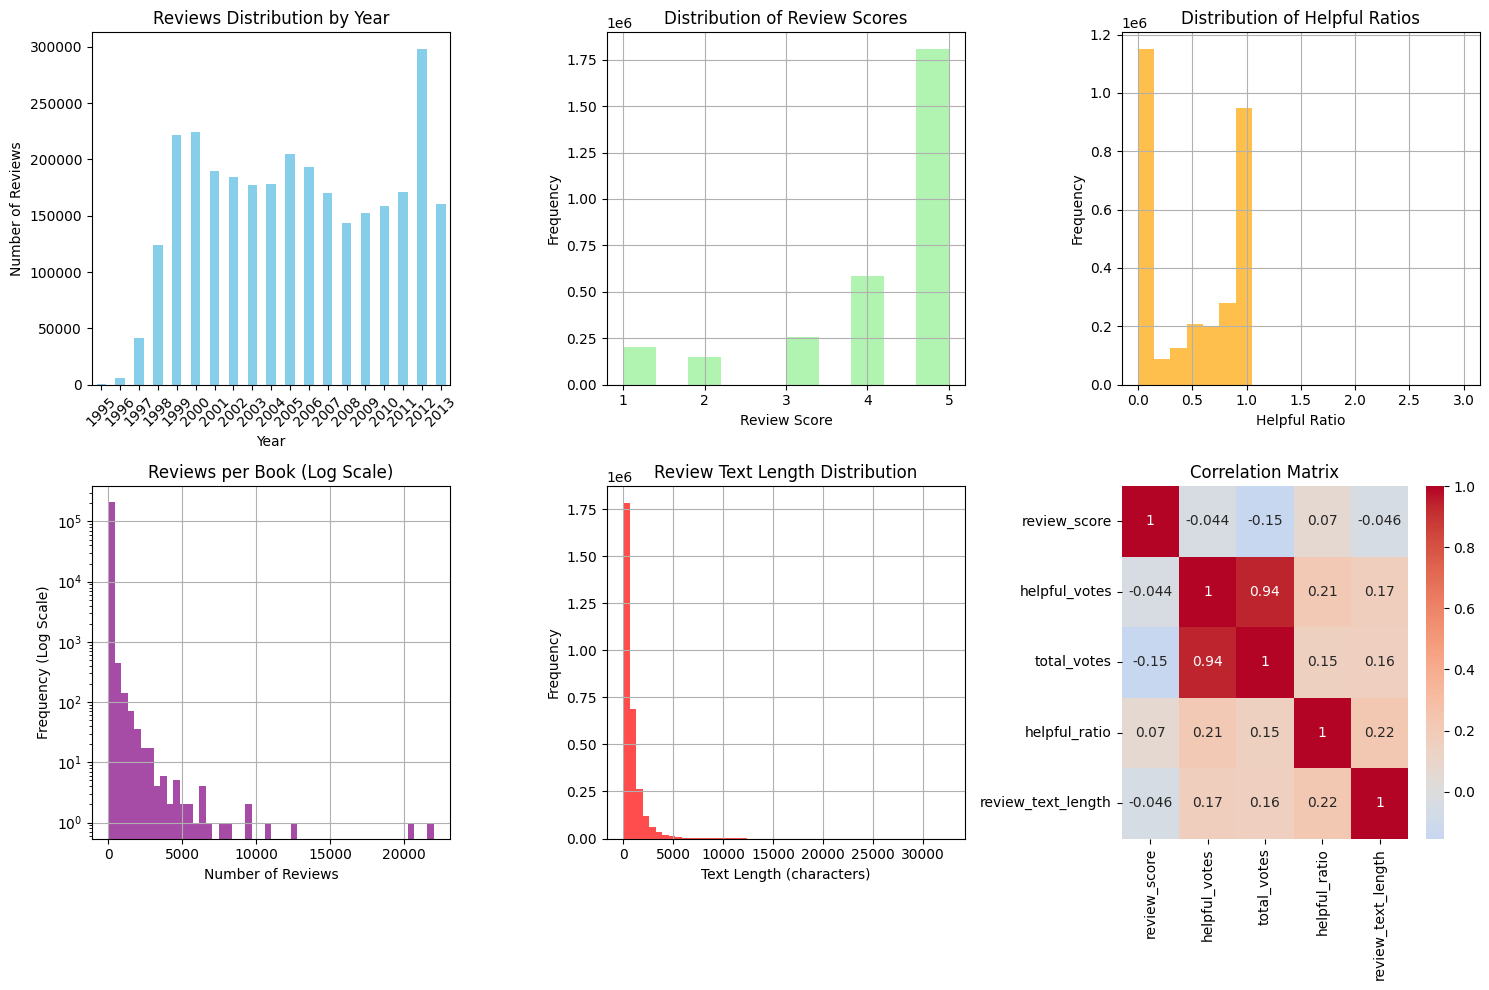


7. DETAILED STATISTICS:
Review score distribution:
review_score
1.0     201676
2.0     151047
3.0     254287
4.0     585593
5.0    1807168
Name: count, dtype: int64
Helpful ratio distribution (binned):
helpful_ratio
(0.0, 0.2]      74447
(0.2, 0.4]     155979
(0.4, 0.6]     258767
(0.6, 0.8]     311584
(0.8, 1.0]    1089387
Name: count, dtype: int64


In [98]:
def analyze_ratings_data(ratings_df):
    print("="*60)
    print("RATINGS DATASET ANALYSIS")
    print("="*60)
    
    # Basic info
    print("\n1. BASIC DATASET INFO:")
    print(f"Shape: {ratings_df.shape}")
    print(f"Columns: {list(ratings_df.columns)}")
    print("\nFirst 5 rows:")
    print(ratings_df.head())
    
    # Data types and missing values
    print("\n2. DATA TYPES AND MISSING VALUES:")
    print(ratings_df.info())
    print("\nMissing values per column:")
    print(ratings_df.isnull().sum())
    
    # Convert reviewdate to datetime
    ratings_df['reviewdate'] = pd.to_datetime(ratings_df['reviewdate'])
    
    # Temporal Analysis
    print("\n3. TEMPORAL ANALYSIS:")
    print(f"Date range: {ratings_df['reviewdate'].min()} to {ratings_df['reviewdate'].max()}")
    print(f"Total time span: {(ratings_df['reviewdate'].max() - ratings_df['reviewdate'].min()).days} days")
    
    # Reviews by year
    ratings_df['review_year'] = ratings_df['reviewdate'].dt.year
    reviews_by_year = ratings_df['review_year'].value_counts().sort_index()
    
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 3, 1)
    reviews_by_year.plot(kind='bar', color='skyblue')
    plt.title('Reviews Distribution by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45)
    
    # Review Score Analysis
    print("\n4. REVIEW SCORE ANALYSIS:")
    print(ratings_df['review_score'].describe())
    
    plt.subplot(2, 3, 2)
    ratings_df['review_score'].hist(bins=10, color='lightgreen', alpha=0.7)
    plt.title('Distribution of Review Scores')
    plt.xlabel('Review Score')
    plt.ylabel('Frequency')
    
    # Helpfulness Analysis
    print("\n5. HELPFULNESS ANALYSIS:")
    print(ratings_df['helpful_ratio'].describe())
    
    plt.subplot(2, 3, 3)
    ratings_df['helpful_ratio'].hist(bins=20, color='orange', alpha=0.7)
    plt.title('Distribution of Helpful Ratios')
    plt.xlabel('Helpful Ratio')
    plt.ylabel('Frequency')
    
    # Review Volume per Book
    reviews_per_book = ratings_df['title'].value_counts()
    
    print("\n6. REVIEWS PER BOOK ANALYSIS:")
    print(f"Total unique books: {ratings_df['title'].nunique()}")
    print(f"Average reviews per book: {reviews_per_book.mean():.2f}")
    print(f"Median reviews per book: {reviews_per_book.median():.2f}")
    print(f"Max reviews for a book: {reviews_per_book.max()}")
    print(f"Books with only 1 review: {(reviews_per_book == 1).sum()}")
    
    plt.subplot(2, 3, 4)
    reviews_per_book.hist(bins=50, color='purple', alpha=0.7, log=True)
    plt.title('Reviews per Book (Log Scale)')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Frequency (Log Scale)')
    
    # Text Length Analysis
    ratings_df['review_text_length'] = ratings_df['review_text'].str.len()
    ratings_df['summary_length'] = ratings_df['review_summary'].str.len()
    
    plt.subplot(2, 3, 5)
    ratings_df['review_text_length'].hist(bins=50, color='red', alpha=0.7)
    plt.title('Review Text Length Distribution')
    plt.xlabel('Text Length (characters)')
    plt.ylabel('Frequency')
    
    # Correlation Analysis
    plt.subplot(2, 3, 6)
    numeric_cols = ['review_score', 'helpful_votes', 'total_votes', 'helpful_ratio', 'review_text_length']
    correlation_matrix = ratings_df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    
    plt.tight_layout()
    plt.show()
    
    # Detailed statistics
    print("\n7. DETAILED STATISTICS:")
    print(f"Review score distribution:\n{ratings_df['review_score'].value_counts().sort_index()}")
    print(f"Helpful ratio distribution (binned):")
    print(pd.cut(ratings_df['helpful_ratio'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0]).value_counts().sort_index())
    
    return ratings_df

# Run ratings analysis
ratings_df = analyze_ratings_data(ratings_clean)

BOOKS DATASET ANALYSIS

1. BASIC DATASET INFO:
Shape: (180989, 16)
Columns: ['title', 'description', 'authors', 'image', 'previewlink', 'publisher', 'infolink', 'categories', 'ratings_count', 'description_length', 'title_length', 'description_word_count', 'avg_word_length', 'readability_score', 'has_description', 'author']

Data types:
title                      object
description                object
authors                    object
image                      object
previewlink                object
publisher                  object
infolink                   object
categories                 object
ratings_count               int64
description_length          int64
title_length                int64
description_word_count      int64
avg_word_length           float64
readability_score         float64
has_description             int64
author                     object
dtype: object

Sample of categories column:
0      [comics & graphic novels]
1    [biography & autobiography]
2       

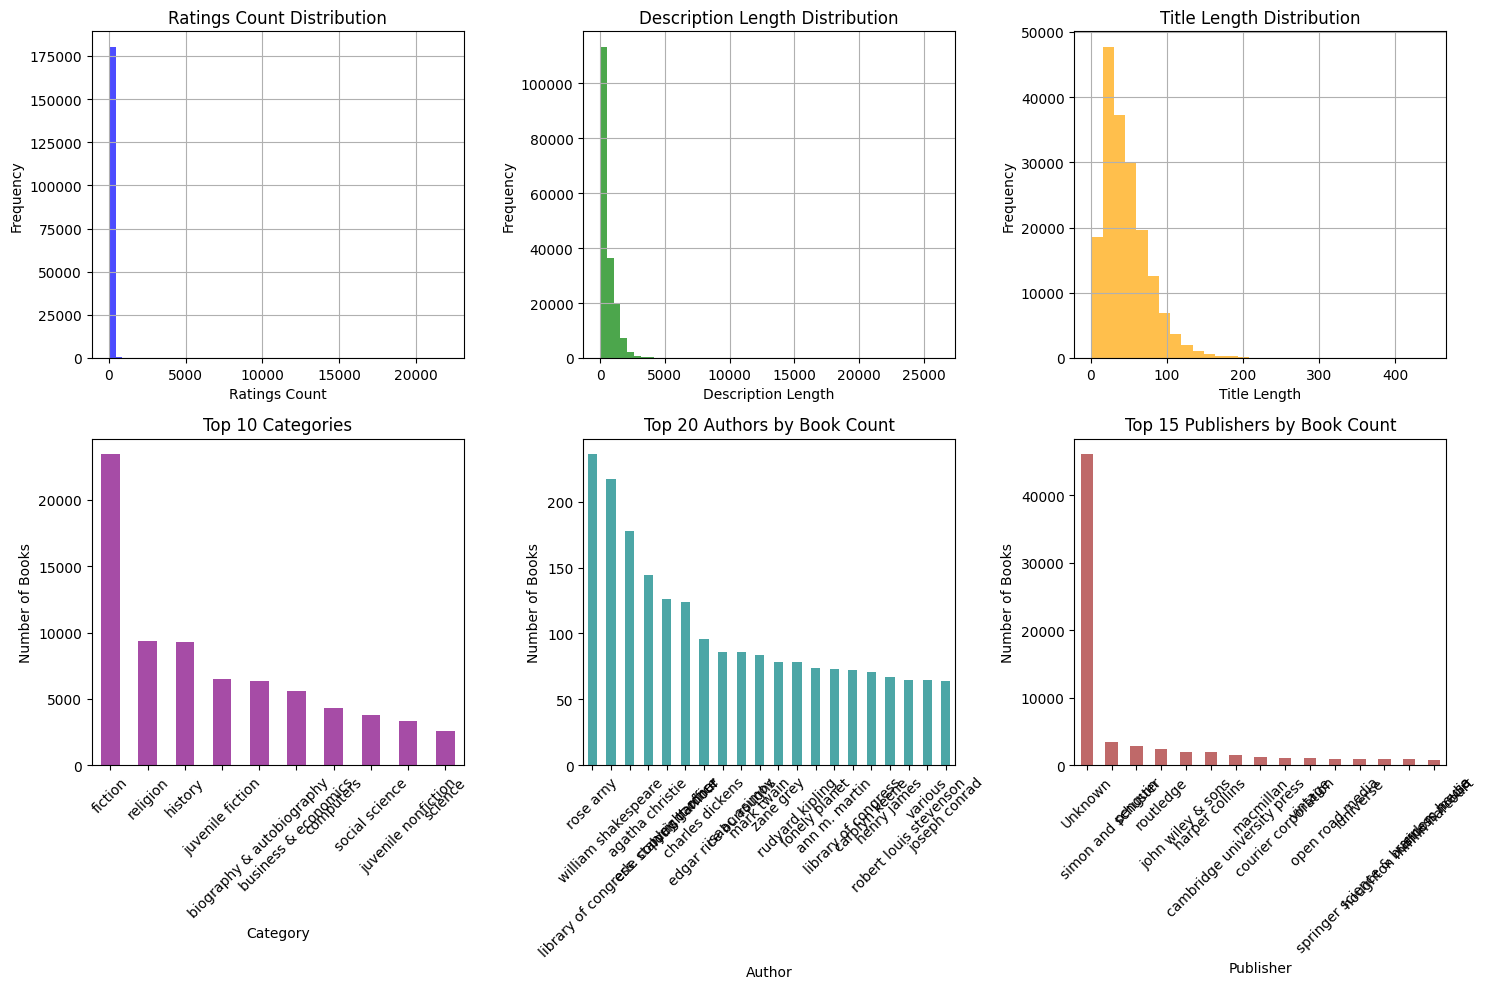


9. ADDITIONAL STATISTICS:
title: 178699 unique values, sample: ['its only art if its well hung!' 'dr. seuss: american icon'
 'wonderful worship in smaller churches']
description: 131532 unique values, sample: [''
 'philip nel takes a fascinating look into the key aspects of seuss\'s career - his poetry, politics, art, marketing, and place in the popular imagination." "nel argues convincingly that dr. seuss is one of the most influential poets in america. his nonsense verse, like that of lewis carroll and edward lear, has changed language itself, giving us new words like "nerd." and seuss\'s famously loopy artistic style - what nel terms an "energetic cartoon surrealism" - has been equally important, inspiring artists like filmmaker tim burton and illustrator lane smith. --from back cover'
 'this resource includes twelve principles in understanding small church worship, fifteen practices for planning worship with fewer than 100 people, and suggestions for congregational study.']
author

In [99]:
def analyze_books_data(books_df):
    print("="*60)
    print("BOOKS DATASET ANALYSIS")
    print("="*60)
    
    # Basic info
    print("\n1. BASIC DATASET INFO:")
    print(f"Shape: {books_df.shape}")
    print(f"Columns: {list(books_df.columns)}")
    print("\nData types:")
    print(books_df.dtypes)
    
    # Check actual content of problematic columns
    print("\nSample of categories column:")
    print(books_df['categories'].iloc[:5])
    print(f"Type of first categories entry: {type(books_df['categories'].iloc[0])}")
    
    # Data types and missing values
    print("\n2. DATA TYPES AND MISSING VALUES:")
    print("\nMissing values per column:")
    print(books_df.isnull().sum())
    
    plt.figure(figsize=(15, 10))
    
    # Ratings count distribution
    print("\n3. RATINGS COUNT ANALYSIS:")
    if 'ratings_count' in books_df.columns:
        print(books_df['ratings_count'].describe())
        
        plt.subplot(2, 3, 1)
        books_df['ratings_count'].hist(bins=50, color='blue', alpha=0.7)
        plt.title('Ratings Count Distribution')
        plt.xlabel('Ratings Count')
        plt.ylabel('Frequency')
    else:
        print("ratings_count column not found")
    
    # Description length analysis
    print("\n4. DESCRIPTION ANALYSIS:")
    if 'description_length' in books_df.columns:
        print(books_df['description_length'].describe())
        
        plt.subplot(2, 3, 2)
        books_df['description_length'].hist(bins=50, color='green', alpha=0.7)
        plt.title('Description Length Distribution')
        plt.xlabel('Description Length')
        plt.ylabel('Frequency')
    else:
        print("description_length column not found")
    
    # Title length analysis
    print("\n5. TITLE ANALYSIS:")
    if 'title' in books_df.columns:
        books_df['title_length'] = books_df['title'].astype(str).str.len()
        print(f"Title length stats: {books_df['title_length'].describe()}")
        
        plt.subplot(2, 3, 3)
        books_df['title_length'].hist(bins=30, color='orange', alpha=0.7)
        plt.title('Title Length Distribution')
        plt.xlabel('Title Length')
        plt.ylabel('Frequency')
    
    # Categories analysis - FIXED VERSION
    print("\n6. CATEGORIES ANALYSIS:")
    if 'categories' in books_df.columns:
        # Check the actual type and convert to string if needed
        print(f"Categories column type: {books_df['categories'].dtype}")
        print(f"Sample values: {books_df['categories'].head(5).tolist()}")
        
        # Safe conversion to string and analysis
        categories_as_string = books_df['categories'].astype(str)
        
        # Count non-empty categories
        non_empty_categories = categories_as_string[categories_as_string != '[]']
        print(f"Books with categories: {len(non_empty_categories)}/{len(books_df)}")
        
        if len(non_empty_categories) > 0:
            # Extract categories safely
            try:
                # Remove brackets and split
                clean_categories = non_empty_categories.str.strip('[]').str.replace("'", "")
                split_categories = clean_categories.str.split(', ')
                
                # Flatten the list and count
                all_categories = []
                for category_list in split_categories.dropna():
                    if isinstance(category_list, list):
                        all_categories.extend([cat.strip() for cat in category_list if cat.strip()])
                
                if all_categories:
                    category_counts = pd.Series(all_categories).value_counts()
                    print(f"Total unique categories: {len(category_counts)}")
                    print(f"Top 10 categories: {category_counts.head(10)}")
                    
                    plt.subplot(2, 3, 4)
                    category_counts.head(10).plot(kind='bar', color='purple', alpha=0.7)
                    plt.title('Top 10 Categories')
                    plt.xlabel('Category')
                    plt.ylabel('Number of Books')
                    plt.xticks(rotation=45)
            except Exception as e:
                print(f"Error processing categories: {e}")
    
    # Authors analysis
    print("\n7. AUTHORS ANALYSIS:")
    if 'author' in books_df.columns:
        print(f"Unique authors: {books_df['author'].nunique()}")
        author_counts = books_df['author'].value_counts()
        print(f"Books per author - Mean: {author_counts.mean():.2f}, Max: {author_counts.max()}")
        print(f"Top 5 authors: {author_counts.head(5)}")
        
        plt.subplot(2, 3, 5)
        author_counts.head(20).plot(kind='bar', color='teal', alpha=0.7)
        plt.title('Top 20 Authors by Book Count')
        plt.xlabel('Author')
        plt.ylabel('Number of Books')
        plt.xticks(rotation=45)
    
    # Publisher analysis
    print("\n8. PUBLISHER ANALYSIS:")
    if 'publisher' in books_df.columns:
        publisher_counts = books_df['publisher'].value_counts()
        print(f"Unique publishers: {books_df['publisher'].nunique()}")
        print(f"Top 10 publishers: {publisher_counts.head(10)}")
        
        plt.subplot(2, 3, 6)
        publisher_counts.head(15).plot(kind='bar', color='brown', alpha=0.7)
        plt.title('Top 15 Publishers by Book Count')
        plt.xlabel('Publisher')
        plt.ylabel('Number of Books')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Additional basic stats
    print("\n9. ADDITIONAL STATISTICS:")
    for col in books_df.columns:
        if books_df[col].dtype in ['object', 'string']:
            unique_count = books_df[col].nunique()
            sample_values = books_df[col].dropna().unique()[:3] if unique_count > 3 else books_df[col].dropna().unique()
            print(f"{col}: {unique_count} unique values, sample: {sample_values}")
    
    return books_df

# Run books analysis with error handling
try:
    books_df = analyze_books_data(books_1)
except Exception as e:
    print(f"Error in books analysis: {e}")
    print("Let's try a simpler approach...")
    
    # Simple analysis without complex processing
    print("\nSIMPLE BOOKS ANALYSIS:")
    print(f"Shape: {books_1.shape}")
    print(f"Columns: {books_1.columns.tolist()}")
    print(f"Data types:\n{books_1.dtypes}")
    print(f"Missing values:\n{books_1.isnull().sum()}")

In [100]:
sns.set(style="whitegrid")

In [101]:
# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [119]:
print(f"Rows with helpful_ratio > 1: {(ratings_clean['helpful_ratio'] > 1).sum()}")

# Drop rows where helpful_ratio is greater than 1 (in-place)
ratings_clean = ratings_clean[ratings_clean['helpful_ratio'] <= 1]

Rows with helpful_ratio > 1: 7


In [120]:
ratings_df = ratings_clean.copy()
books_df = books_1.copy()

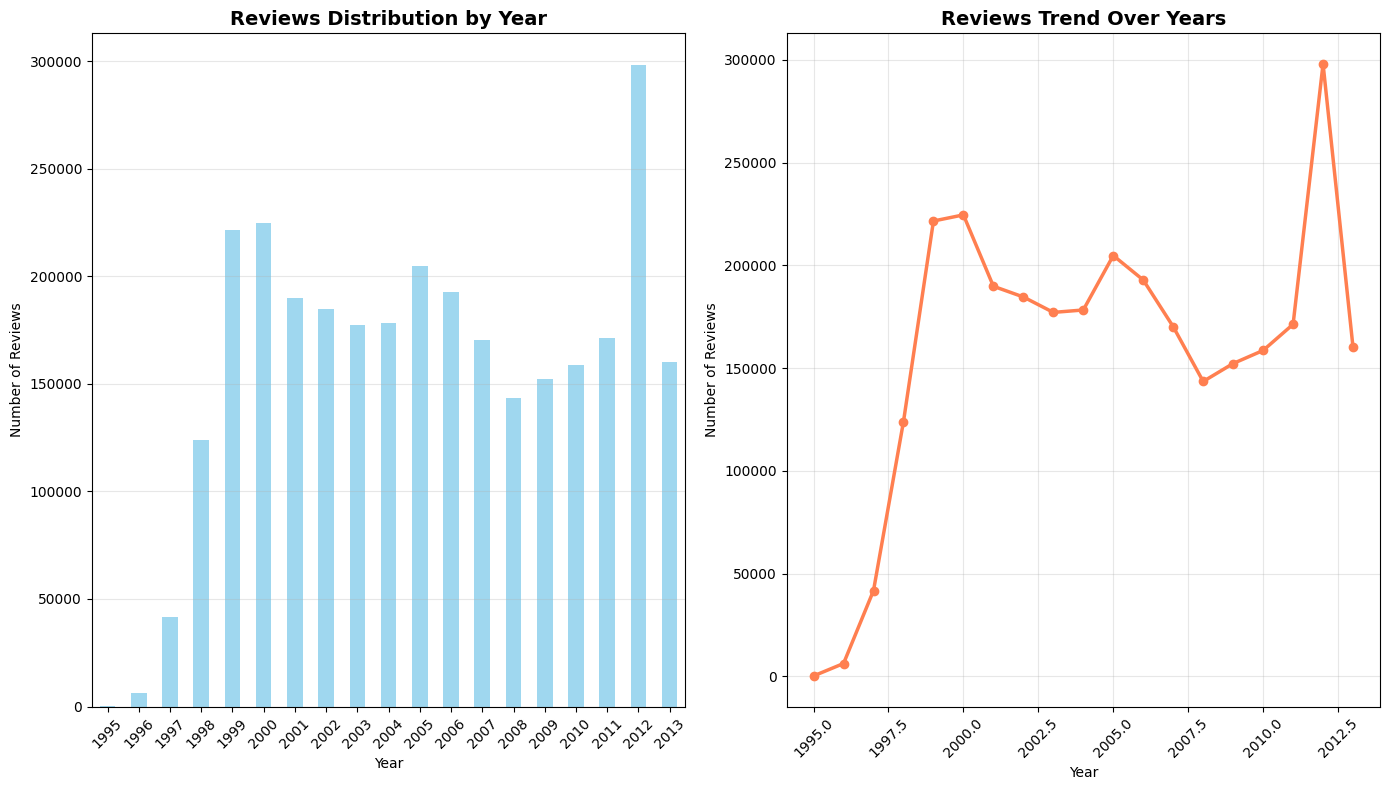

Date range: 1995-06-24 00:00:00 to 2013-03-04 00:00:00
Total years: 19


In [121]:
# Convert reviewdate to datetime and extract year
ratings_df['reviewdate'] = pd.to_datetime(ratings_df['reviewdate'])
ratings_df['review_year'] = ratings_df['reviewdate'].dt.year

# Plot reviews distribution by year
plt.figure(figsize=(14, 8))
reviews_by_year = ratings_df['review_year'].value_counts().sort_index()

plt.subplot(1, 2, 1)
reviews_by_year.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Reviews Distribution by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
reviews_by_year.plot(kind='line', marker='o', color='coral', linewidth=2.5)
plt.title('Reviews Trend Over Years', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Date range: {ratings_df['reviewdate'].min()} to {ratings_df['reviewdate'].max()}")
print(f"Total years: {ratings_df['review_year'].nunique()}")

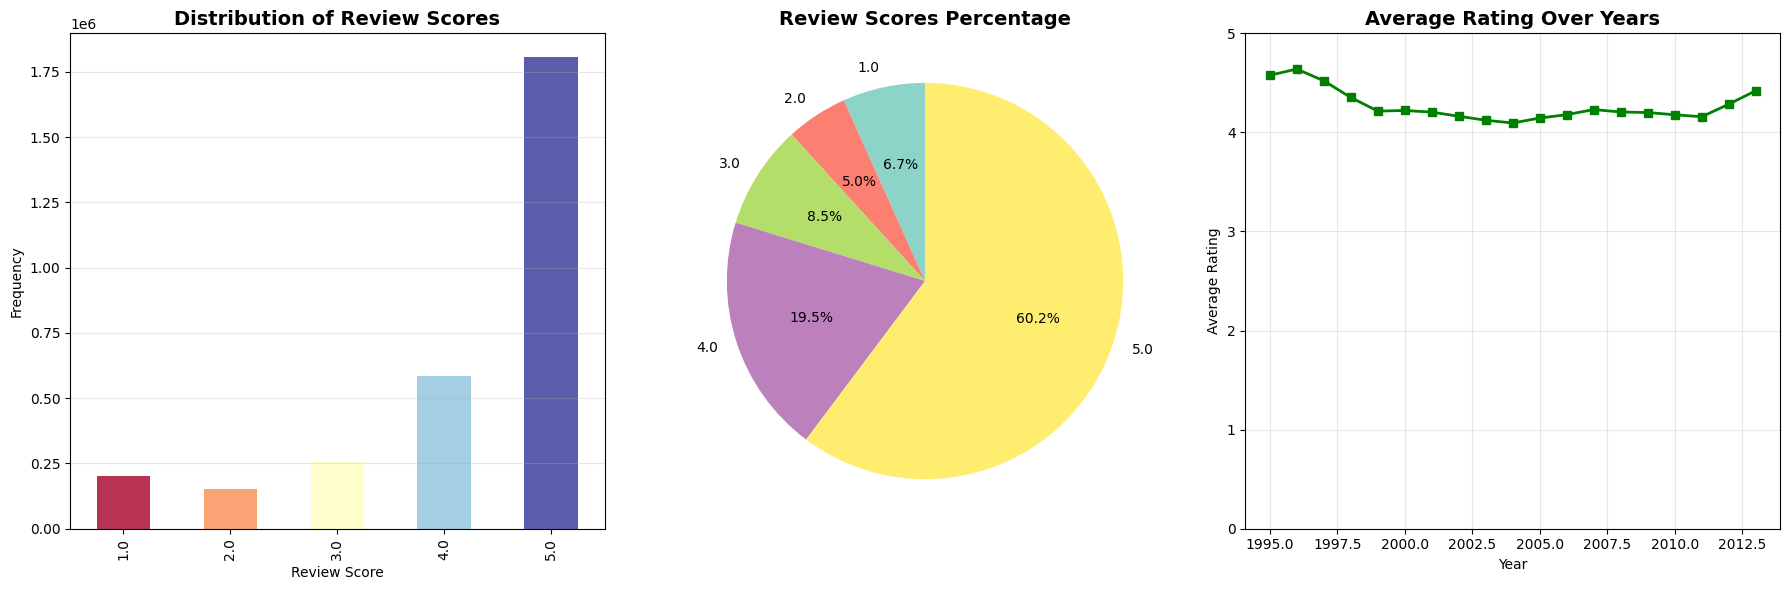

Overall average rating: 4.22
Rating distribution:
review_score
1.0     201676
2.0     151045
3.0     254287
4.0     585593
5.0    1807163
Name: count, dtype: int64


In [122]:
# Review score analysis - Side by side layout
plt.figure(figsize=(18, 6))

# Distribution of review scores
plt.subplot(1, 3, 1)
score_distribution = ratings_df['review_score'].value_counts().sort_index()
colors = plt.cm.RdYlBu(np.linspace(0, 1, len(score_distribution)))
score_distribution.plot(kind='bar', color=colors, alpha=0.8)
plt.title('Distribution of Review Scores', fontsize=14, fontweight='bold')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

# Pie chart of review scores
plt.subplot(1, 3, 2)
score_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                       colors=plt.cm.Set3(np.linspace(0, 1, len(score_distribution))))
plt.title('Review Scores Percentage', fontsize=14, fontweight='bold')
plt.ylabel('')

# Average rating over years
plt.subplot(1, 3, 3)
avg_rating_by_year = ratings_df.groupby('review_year')['review_score'].mean()
avg_rating_by_year.plot(kind='line', marker='s', color='green', linewidth=2)
plt.title('Average Rating Over Years', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True, alpha=0.3)
plt.ylim(0, 5)

plt.tight_layout()
plt.show()

print(f"Overall average rating: {ratings_df['review_score'].mean():.2f}")
print(f"Rating distribution:\n{score_distribution}")

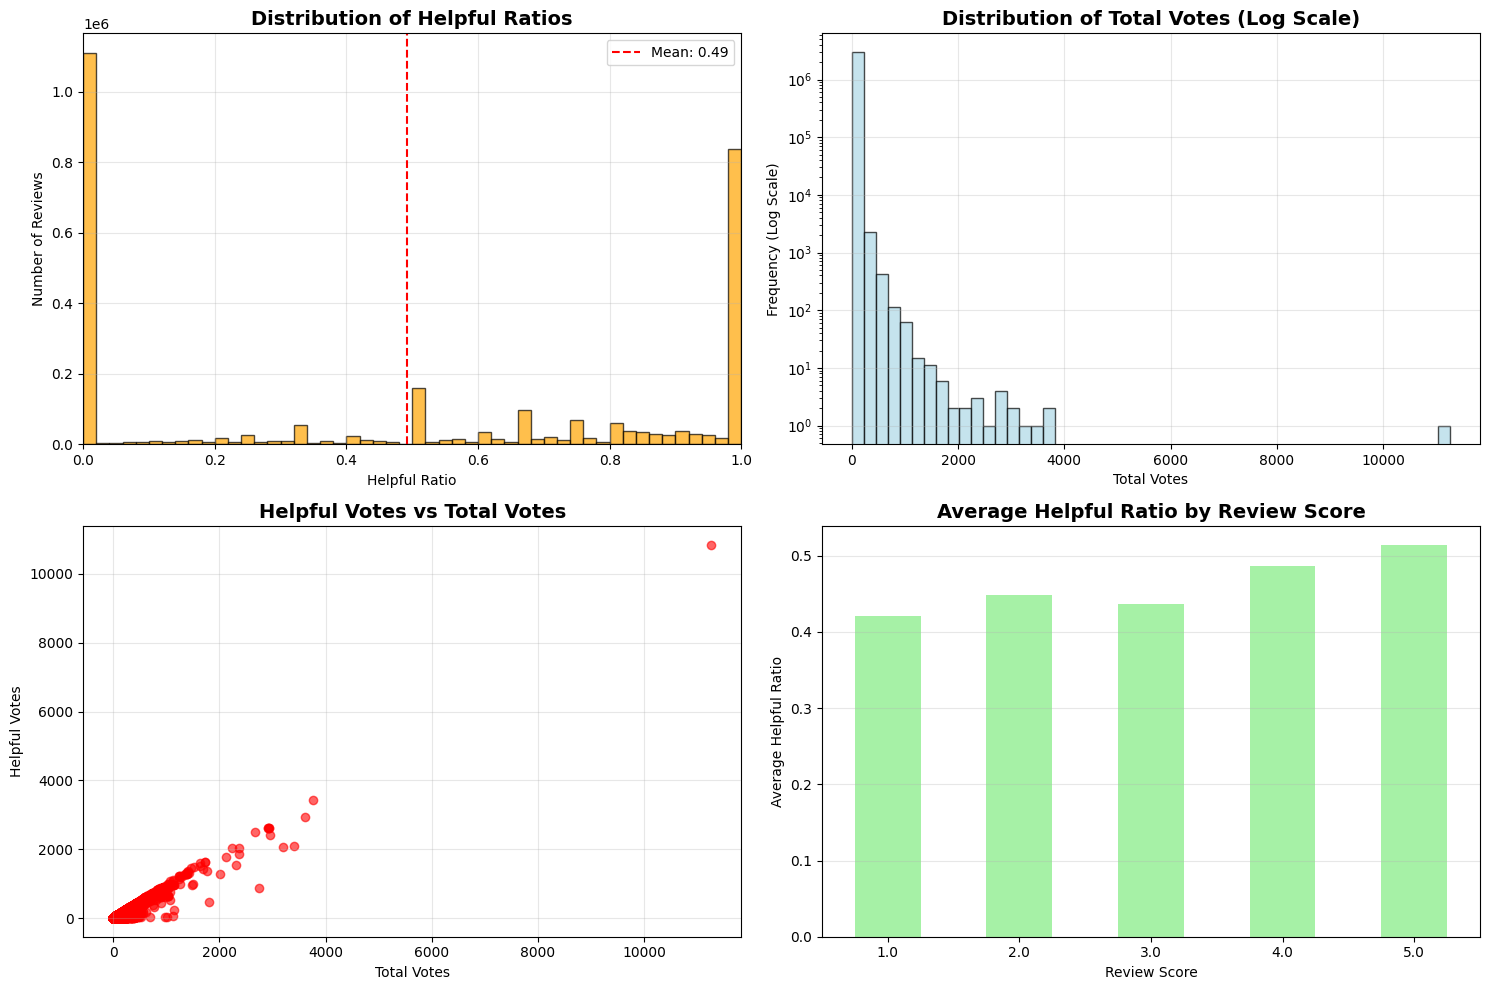

Mean helpful ratio: 0.492
Median helpful ratio: 0.500
Average helpful ratio: 0.492
Reviews with no votes: 885699


In [133]:
# Helpfulness analysis - Single figure with all subplots
plt.figure(figsize=(15, 10))

# Distribution of helpful ratios
plt.subplot(2, 2, 1)
ratings_df['helpful_ratio'].hist(bins=30, color='orange', alpha=0.7, edgecolor='black', density=False)
plt.title('Distribution of Helpful Ratios', fontsize=14, fontweight='bold')
plt.xlabel('Helpful Ratio')
plt.ylabel('Number of Reviews')
plt.xlim(0, 1.0)
plt.grid(alpha=0.3)

# Add mean line
mean_ratio = ratings_df['helpful_ratio'].mean()
plt.axvline(mean_ratio, color='red', linestyle='--', label=f'Mean: {mean_ratio:.2f}')
plt.legend()

# Votes distribution
plt.subplot(2, 2, 2)
ratings_df['total_votes'].hist(bins=50, color='lightblue', alpha=0.7, edgecolor='black', log=True)
plt.title('Distribution of Total Votes (Log Scale)', fontsize=14, fontweight='bold')
plt.xlabel('Total Votes')
plt.ylabel('Frequency (Log Scale)')
plt.grid(alpha=0.3)

# Helpful votes vs total votes
plt.subplot(2, 2, 3)
plt.scatter(ratings_df['total_votes'], ratings_df['helpful_votes'], alpha=0.6, color='red')
plt.xlabel('Total Votes')
plt.ylabel('Helpful Votes')
plt.title('Helpful Votes vs Total Votes', fontsize=14, fontweight='bold')
plt.xlim()
plt.grid(True, alpha=0.3)

# Helpful ratio by review score
plt.subplot(2, 2, 4)
helpful_by_score = ratings_df.groupby('review_score')['helpful_ratio'].mean()
helpful_by_score.plot(kind='bar', color='lightgreen', alpha=0.8)
plt.title('Average Helpful Ratio by Review Score', fontsize=14, fontweight='bold')
plt.xlabel('Review Score')
plt.ylabel('Average Helpful Ratio')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print(f"Mean helpful ratio: {ratings_df['helpful_ratio'].mean():.3f}")
print(f"Median helpful ratio: {ratings_df['helpful_ratio'].median():.3f}")
print(f"Average helpful ratio: {ratings_df['helpful_ratio'].mean():.3f}")
print(f"Reviews with no votes: {(ratings_df['total_votes'] == 0).sum()}")

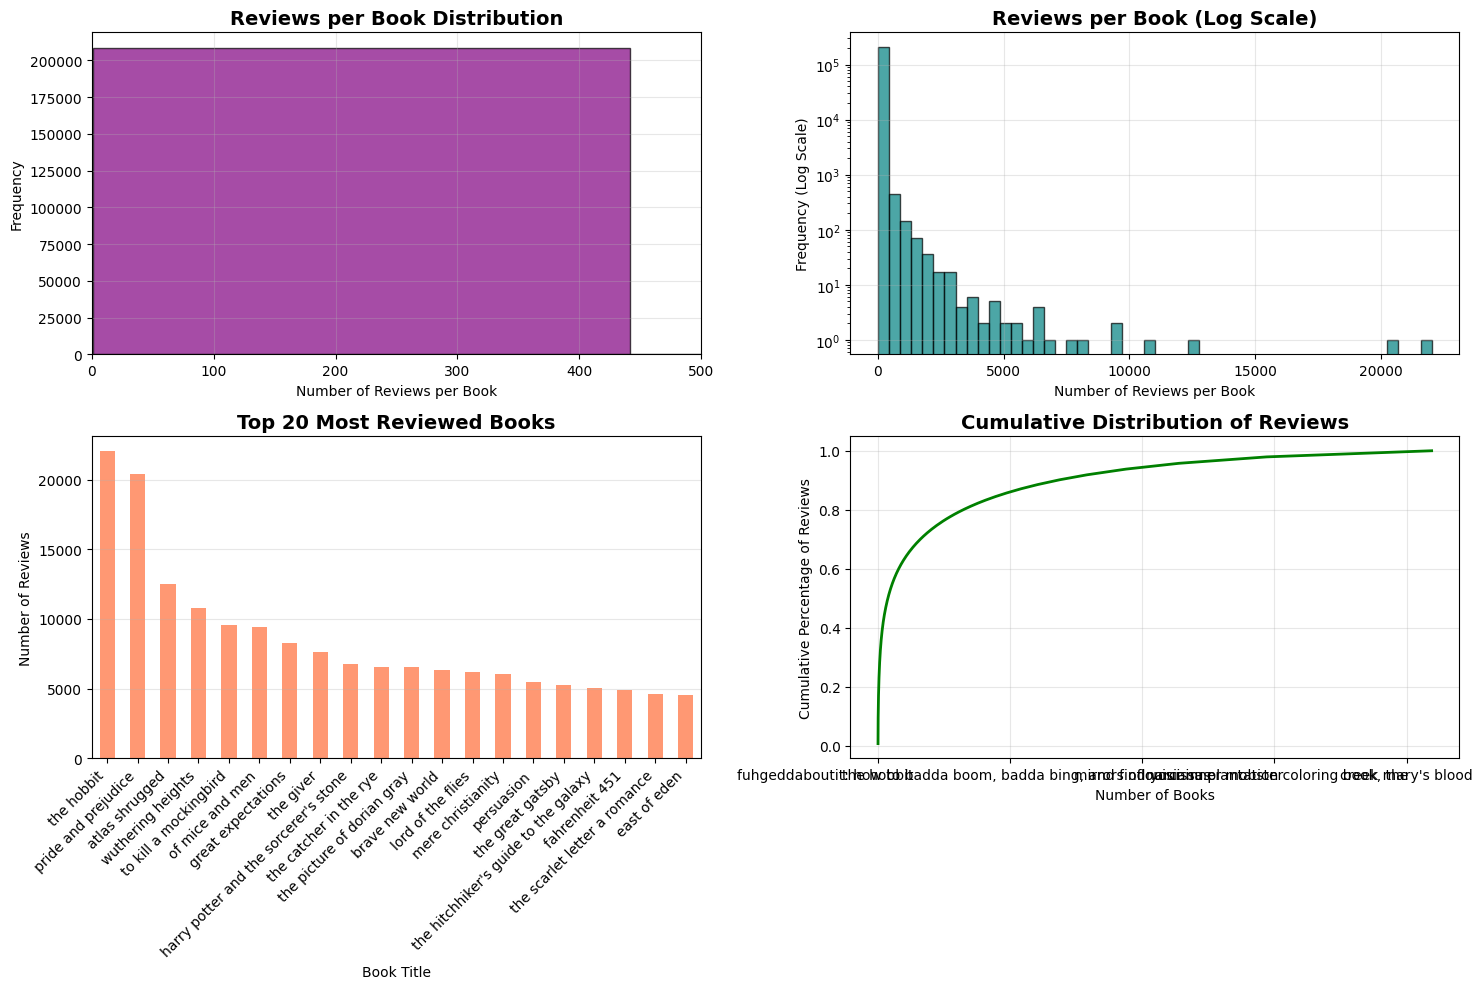

Total unique books: 209455
Average reviews per book: 14.32
Median reviews per book: 3.00
Books with 10+ reviews: 43231
Top 5 books by reviews:
title
the hobbit               22023
pride and prejudice      20371
atlas shrugged           12513
wuthering heights        10780
to kill a mockingbird     9601
Name: count, dtype: int64


In [124]:
# Reviews per book analysis
reviews_per_book = ratings_df['title'].value_counts()

plt.figure(figsize=(15, 10))

# Histogram of reviews per book
plt.subplot(2, 2, 1)
reviews_per_book.hist(bins=50, color='purple', alpha=0.7, edgecolor='black')
plt.title('Reviews per Book Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Number of Reviews per Book')
plt.ylabel('Frequency')
plt.xlim(0, 500)
plt.grid(alpha=0.3)

# Log scale histogram
plt.subplot(2, 2, 2)
reviews_per_book.hist(bins=50, color='teal', alpha=0.7, edgecolor='black', log=True)
plt.title('Reviews per Book (Log Scale)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Reviews per Book')
plt.ylabel('Frequency (Log Scale)')
plt.grid(alpha=0.3)

# Top 20 most reviewed books
plt.subplot(2, 2, 3)
top_20_books = reviews_per_book.head(20)
top_20_books.plot(kind='bar', color='coral', alpha=0.8)
plt.title('Top 20 Most Reviewed Books', fontsize=14, fontweight='bold')
plt.xlabel('Book Title')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Cumulative distribution
plt.subplot(2, 2, 4)
cumulative_dist = reviews_per_book.sort_values(ascending=False).cumsum() / reviews_per_book.sum()
cumulative_dist.plot(kind='line', color='green', linewidth=2)
plt.title('Cumulative Distribution of Reviews', fontsize=14, fontweight='bold')
plt.xlabel('Number of Books')
plt.ylabel('Cumulative Percentage of Reviews')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Total unique books: {len(reviews_per_book)}")
print(f"Average reviews per book: {reviews_per_book.mean():.2f}")
print(f"Median reviews per book: {reviews_per_book.median():.2f}")
print(f"Books with 10+ reviews: {(reviews_per_book >= 10).sum()}")
print(f"Top 5 books by reviews:\n{reviews_per_book.head()}")

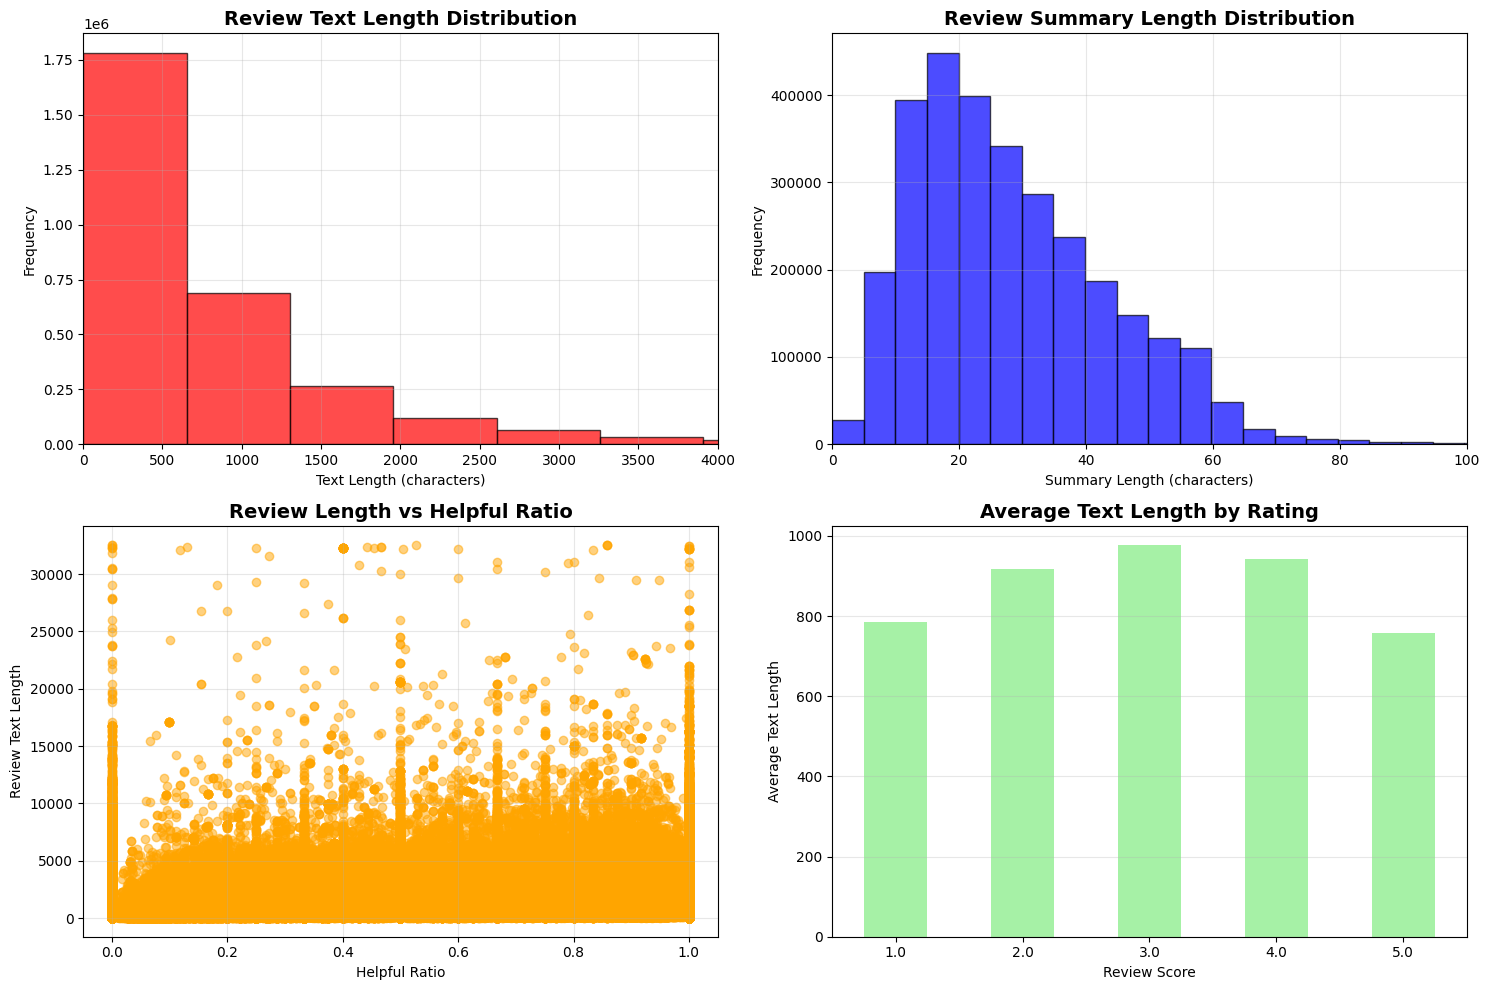

Average review text length: 822.6 characters
Average summary length: 28.1 characters


In [135]:
# Text length analysis
ratings_df['review_text_length'] = ratings_df['review_text'].str.len()
ratings_df['summary_length'] = ratings_df['review_summary'].str.len()

plt.figure(figsize=(15, 10))

# Review text length distribution
plt.subplot(2, 2, 1)
ratings_df['review_text_length'].hist(bins=50, color='red', alpha=0.7, edgecolor='black')
plt.title('Review Text Length Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.xlim(0, 4000)
plt.grid(alpha=0.3)

# Summary length distribution
plt.subplot(2, 2, 2)
ratings_df['summary_length'].hist(bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Review Summary Length Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Summary Length (characters)')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.grid(alpha=0.3)

# Text length vs helpful ratio
plt.subplot(2, 2, 3)
plt.scatter(ratings_df['helpful_ratio'],ratings_df['review_text_length'] , alpha=0.5, color='orange')
plt.title('Review Length vs Helpful Ratio', fontsize=14, fontweight='bold')
plt.xlabel('Helpful Ratio')
plt.ylabel('Review Text Length')
plt.grid(True, alpha=0.3)

# Text length by rating
plt.subplot(2, 2, 4)
text_length_by_rating = ratings_df.groupby('review_score')['review_text_length'].mean()
text_length_by_rating.plot(kind='bar', color='lightgreen', alpha=0.8)
plt.title('Average Text Length by Rating', fontsize=14, fontweight='bold')
plt.xlabel('Review Score')
plt.ylabel('Average Text Length')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Average review text length: {ratings_df['review_text_length'].mean():.1f} characters")
print(f"Average summary length: {ratings_df['summary_length'].mean():.1f} characters")

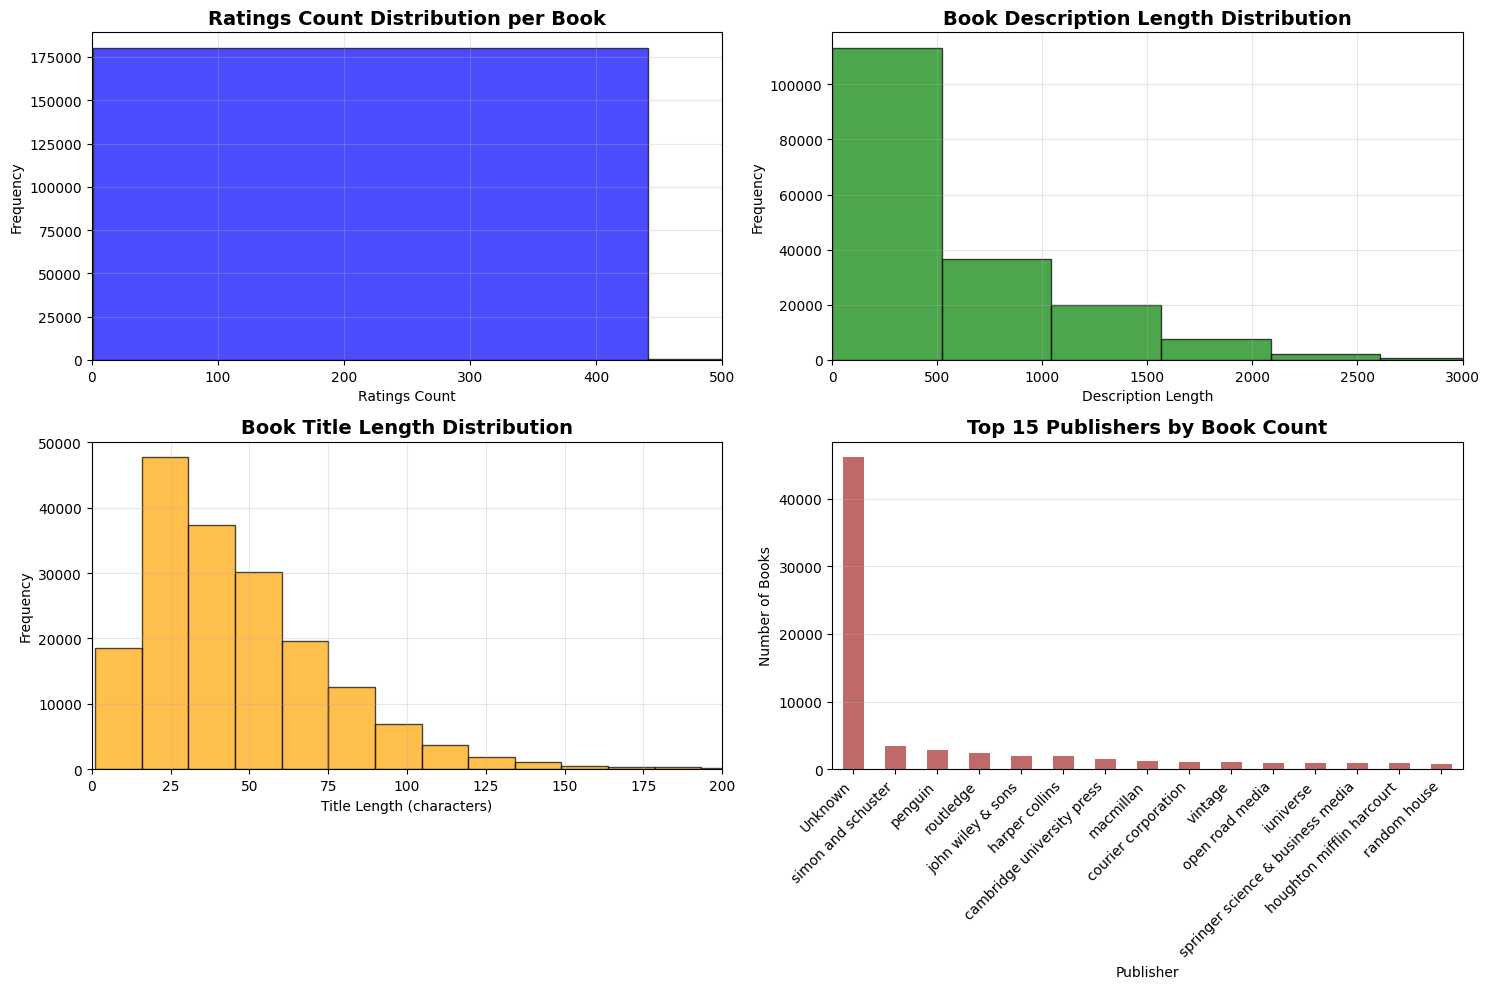

Books dataset - Ratings count stats:
count    180989.000000
mean         15.884054
std         136.267395
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max       22023.000000
Name: ratings_count, dtype: float64


In [126]:
# Books dataset analysis
plt.figure(figsize=(15, 10))

# Ratings count distribution
plt.subplot(2, 2, 1)
if 'ratings_count' in books_df.columns:
    books_df['ratings_count'].hist(bins=50, color='blue', alpha=0.7, edgecolor='black')
    plt.title('Ratings Count Distribution per Book', fontsize=14, fontweight='bold')
    plt.xlabel('Ratings Count')
    plt.ylabel('Frequency')
    plt.xlim(0, 500) 
    plt.grid(alpha=0.3)

# Description length distribution
plt.subplot(2, 2, 2)
if 'description_length' in books_df.columns:
    books_df['description_length'].hist(bins=50, color='green', alpha=0.7, edgecolor='black')
    plt.title('Book Description Length Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Description Length')
    plt.ylabel('Frequency')
    plt.xlim(0, 3000) 
    plt.grid(alpha=0.3)

# Title length distribution
plt.subplot(2, 2, 3)
books_df['title_length'] = books_df['title'].str.len()
books_df['title_length'].hist(bins=30, color='orange', alpha=0.7, edgecolor='black')
plt.title('Book Title Length Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Title Length (characters)')
plt.ylabel('Frequency')
plt.xlim(0, 200)
plt.grid(alpha=0.3)

# Publisher analysis (top 15)
plt.subplot(2, 2, 4)
if 'publisher' in books_df.columns:
    top_publishers = books_df['publisher'].value_counts().head(15)
    top_publishers.plot(kind='bar', color='brown', alpha=0.7)
    plt.title('Top 15 Publishers by Book Count', fontsize=14, fontweight='bold')
    plt.xlabel('Publisher')
    plt.ylabel('Number of Books')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
if 'ratings_count' in books_df.columns:
    print(f"Books dataset - Ratings count stats:")
    print(books_df['ratings_count'].describe())

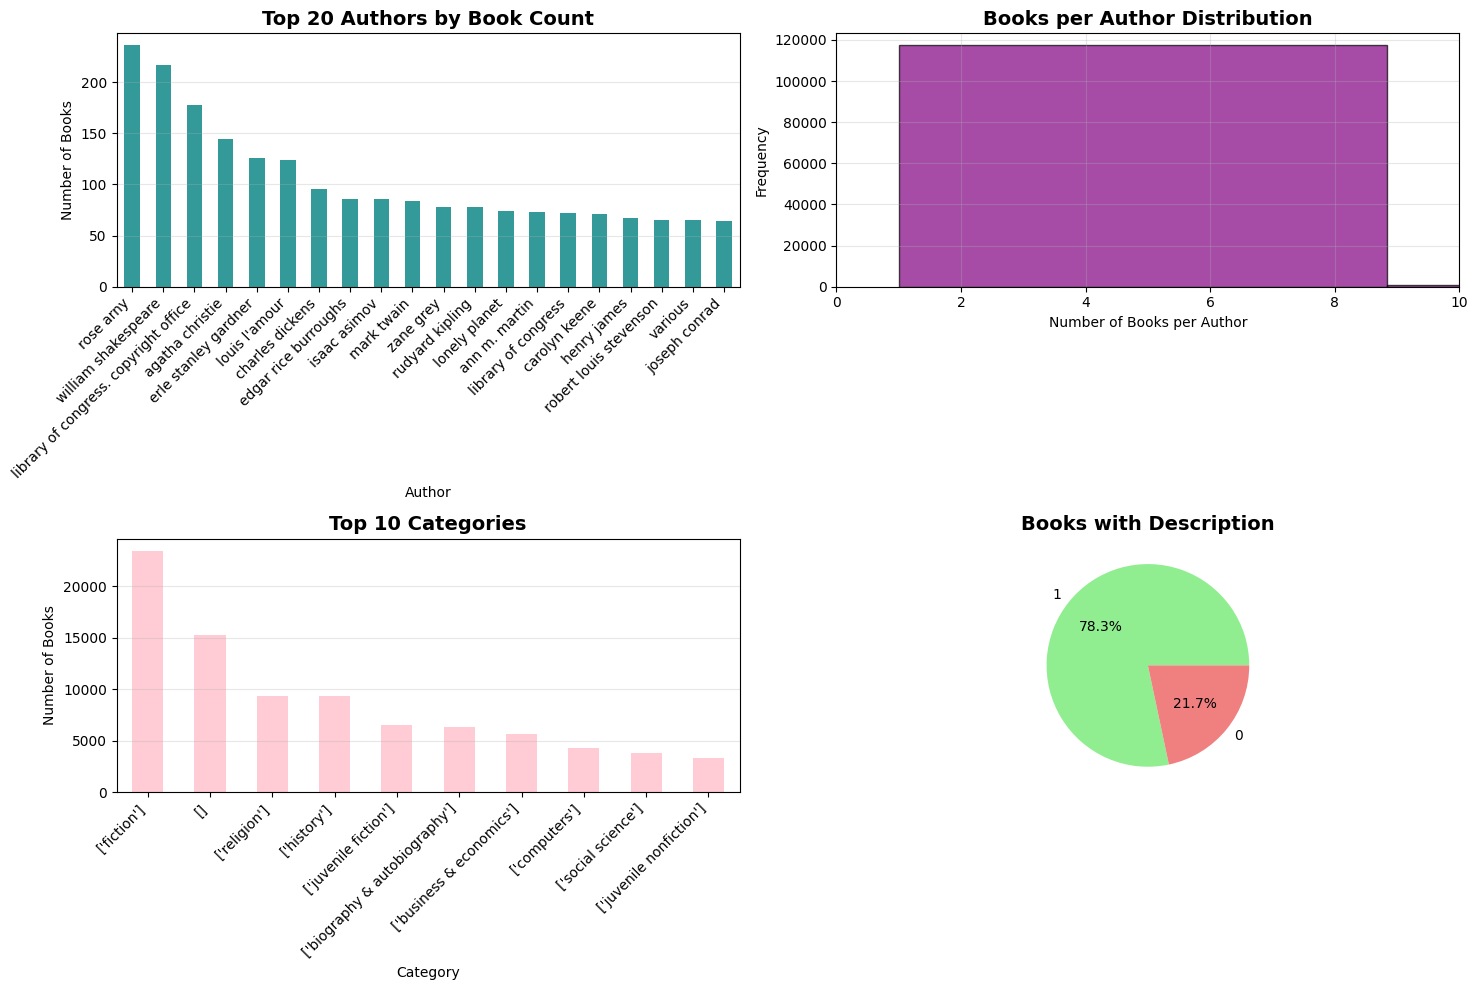

Total unique authors: 118567
Average books per author: 1.53


In [127]:
# Authors analysis
plt.figure(figsize=(15, 10))

# Top authors by book count
plt.subplot(2, 2, 1)
if 'author' in books_df.columns:
    top_authors = books_df['author'].value_counts().head(20)
    top_authors.plot(kind='bar', color='teal', alpha=0.8)
    plt.title('Top 20 Authors by Book Count', fontsize=14, fontweight='bold')
    plt.xlabel('Author')
    plt.ylabel('Number of Books')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

# Books per author distribution
plt.subplot(2, 2, 2)
if 'author' in books_df.columns:
    books_per_author = books_df['author'].value_counts()
    books_per_author.hist(bins=30, color='purple', alpha=0.7, edgecolor='black')
    plt.title('Books per Author Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Books per Author')
    plt.ylabel('Frequency')
    plt.xlim(0, 10)  # Set X-axis range from 0 to 10
    plt.grid(alpha=0.3)


# Categories analysis (if available)
plt.subplot(2, 2, 3)
if 'categories' in books_df.columns:
    # Convert categories to string and analyze
    categories_str = books_df['categories'].astype(str)
    # Simple category count (you can enhance this based on your actual data format)
    category_counts = categories_str.value_counts().head(10)
    category_counts.plot(kind='bar', color='pink', alpha=0.8)
    plt.title('Top 10 Categories', fontsize=14, fontweight='bold')
    plt.xlabel('Category')
    plt.ylabel('Number of Books')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

# Has description analysis
plt.subplot(2, 2, 4)
if 'has_description' in books_df.columns:
    has_desc_counts = books_df['has_description'].value_counts()
    has_desc_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
    plt.title('Books with Description', fontsize=14, fontweight='bold')
    plt.ylabel('')

plt.tight_layout()
plt.show()

if 'author' in books_df.columns:
    print(f"Total unique authors: {books_df['author'].nunique()}")
    print(f"Average books per author: {books_df['author'].value_counts().mean():.2f}")

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


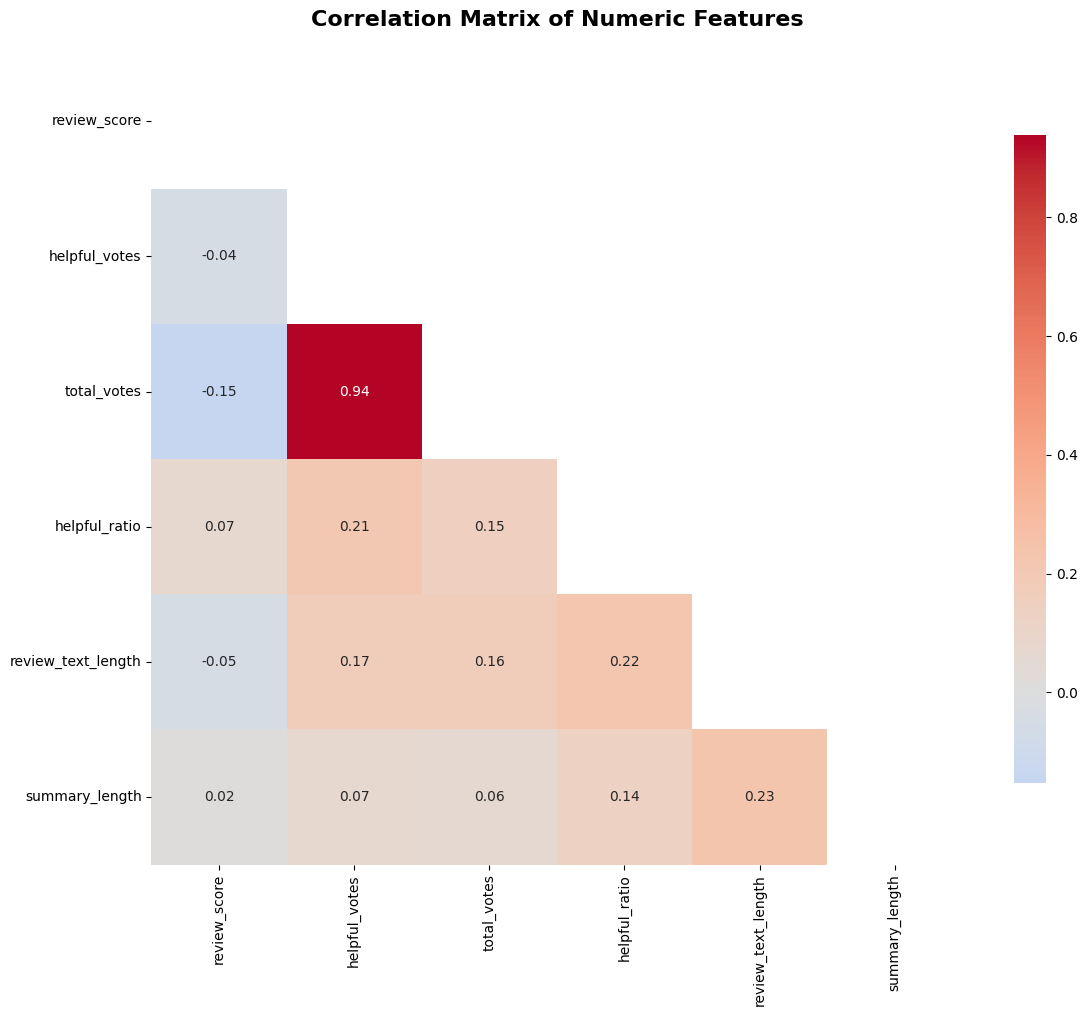

Correlation Matrix Values:
                    review_score  helpful_votes  total_votes  helpful_ratio  \
review_score            1.000000      -0.043926    -0.153593       0.069843   
helpful_votes          -0.043926       1.000000     0.939220       0.212324   
total_votes            -0.153593       0.939220     1.000000       0.151157   
helpful_ratio           0.069843       0.212324     0.151157       1.000000   
review_text_length     -0.045700       0.169765     0.162993       0.224239   
summary_length          0.016505       0.071119     0.062572       0.137848   

                    review_text_length  summary_length  
review_score                 -0.045700        0.016505  
helpful_votes                 0.169765        0.071119  
total_votes                   0.162993        0.062572  
helpful_ratio                 0.224239        0.137848  
review_text_length            1.000000        0.228780  
summary_length                0.228780        1.000000  


In [128]:
# Correlation analysis
plt.figure(figsize=(12, 10))

# Select numeric columns for correlation
numeric_cols = []
for col in ['review_score', 'helpful_votes', 'total_votes', 'helpful_ratio', 'review_text_length', 'summary_length']:
    if col in ratings_df.columns:
        numeric_cols.append(col)

if len(numeric_cols) > 1:
    correlation_matrix = ratings_df[numeric_cols].corr()
    
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f', cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix of Numeric Features', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    print("Correlation Matrix Values:")
    print(correlation_matrix)
else:
    print("Not enough numeric columns for correlation analysis")

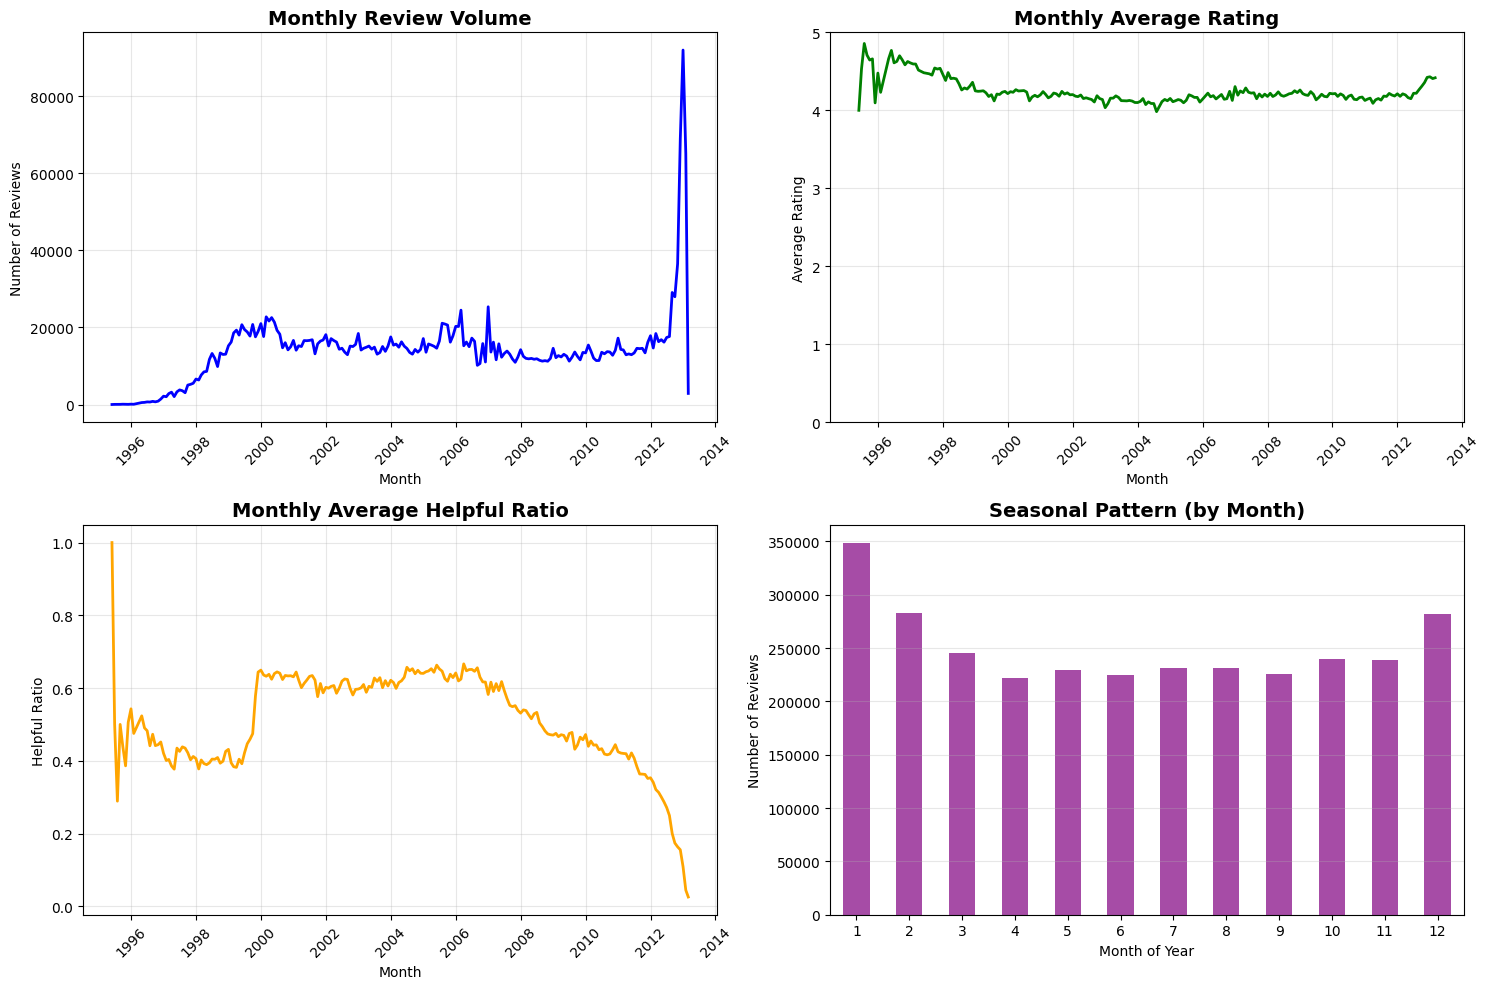

Monthly statistics sample:
              review_score  helpful_ratio  review_count
review_month                                           
1995-06-01        4.000000       1.000000             1
1995-07-01        4.531250       0.500713            32
1995-08-01        4.857143       0.288988            28
1995-09-01        4.707317       0.500016            41
1995-10-01        4.644737       0.439170            76


In [129]:
# Monthly trends analysis
ratings_df['review_month'] = ratings_df['reviewdate'].dt.to_period('M')
monthly_stats = ratings_df.groupby('review_month').agg({
    'review_score': 'mean',
    'helpful_ratio': 'mean',
    'title': 'count'
}).rename(columns={'title': 'review_count'})

# Convert period to timestamp for plotting
monthly_stats.index = monthly_stats.index.to_timestamp()

plt.figure(figsize=(15, 10))

# Monthly review count
plt.subplot(2, 2, 1)
plt.plot(monthly_stats.index, monthly_stats['review_count'], color='blue', linewidth=2)
plt.title('Monthly Review Volume', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Monthly average rating
plt.subplot(2, 2, 2)
plt.plot(monthly_stats.index, monthly_stats['review_score'], color='green', linewidth=2)
plt.title('Monthly Average Rating', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.grid(True, alpha=0.3)
plt.ylim(0, 5)
plt.xticks(rotation=45)

# Monthly helpful ratio
plt.subplot(2, 2, 3)
plt.plot(monthly_stats.index, monthly_stats['helpful_ratio'], color='orange', linewidth=2)
plt.title('Monthly Average Helpful Ratio', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Helpful Ratio')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Seasonal pattern (month of year)
plt.subplot(2, 2, 4)
ratings_df['review_month_num'] = ratings_df['reviewdate'].dt.month
monthly_pattern = ratings_df.groupby('review_month_num')['review_score'].count()
monthly_pattern.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Seasonal Pattern (by Month)', fontsize=14, fontweight='bold')
plt.xlabel('Month of Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Monthly statistics sample:")
print(monthly_stats.head())

In [133]:
# Statistical summary
print("=== STATISTICAL SUMMARY ===")
print(ratings_clean[['review_score', 'helpful_votes', 'total_votes', 'helpful_ratio']].describe())

=== STATISTICAL SUMMARY ===
       review_score  helpful_votes   total_votes  helpful_ratio
count  2.999771e+06   2.999771e+06  2.999771e+06   2.999771e+06
mean   4.215269e+00   4.755337e+00  6.846122e+00   4.924173e-01
std    1.203058e+00   1.761188e+01  2.125143e+01   4.309177e-01
min    1.000000e+00   0.000000e+00  0.000000e+00   0.000000e+00
25%    4.000000e+00   0.000000e+00  0.000000e+00   0.000000e+00
50%    5.000000e+00   1.000000e+00  2.000000e+00   5.000000e-01
75%    5.000000e+00   4.000000e+00  7.000000e+00   1.000000e+00
max    5.000000e+00   1.085500e+04  1.126200e+04   3.000000e+00


In [135]:
# Merge datasets
merged_df = pd.merge(ratings_clean, books_1, on='title', how='inner')

print(f"Merged dataset shape: {merged_df.shape}")

Merged dataset shape: (2874819, 28)


In [139]:
monthly_book_stats

review_score  \
                                                                            count   
title                                              review_year_month                
" film technique, " and, " film acting "           2000-02                      1   
                                                   2009-08                      1   
" we'll always have paris": the definitive guid... 2004-03                      1   
                                                   2007-12                      1   
"... and poetry is born ..." russian classical ... 2010-09                      1   
...                                                                           ...   
zymurgy for the homebrewer and beer lover: the ... 1999-12                      1   
                                                   2007-11                      1   
                                                   2008-08                      1   
                                                   2010-08                      1   
                                                   2011-03                      1   

                                                                           \
                                                                     mean   
title                                              review_year_month        
" film technique, " and, " film acting "           2000-02            4.0   
                                                   2009-08            5.0   
" we'll always have paris": the definitive guid... 2004-03            5.0   
                                                   2007-12            5.0   
"... and poetry is born ..." russian classical ... 2010-09            4.0   
...                                                                   ...   
zymurgy for the homebrewer and beer lover: the ... 1999-12            4.0   
                                                   2007-11            4.0   
                                                   2008-08            4.0   
                                                   2010-08            5.0   
                                                   2011-03            5.0   

                                                                     helpful_votes  \
                                                                               sum   
title                                              review_year_month                 
" film technique, " and, " film acting "           2000-02                       7   
                                                   2009-08                       0   
" we'll always have paris": the definitive guid... 2004-03                       0   
                                                   2007-12                       0   
"... and poetry is born ..." russian classical ... 2010-09                       0   
...                                                                            ...   
zymurgy for the homebrewer and beer lover: the ... 1999-12                       9   
                                                   2007-11                       0   
                                                   2008-08                       0   
                                                   2010-08                       0   
                                                   2011-03                       0   

                                                                     total_votes  \
                                                                             sum   
title                                              review_year_month               
" film technique, " and, " film acting "           2000-02                     8   
                                                   2009-08                     0   
" we'll always have paris": the definitive guid... 2004-03                     1   
                                                   2007-12                     0   
"... a

In [138]:
monthly_book_stats = merged_df.groupby(['title', 'review_year_month']).agg({
    'review_score': ['count', 'mean'],
    'helpful_votes': 'sum',
    'total_votes': 'sum',
    'helpful_ratio': 'mean'
}).round(2)

In [140]:
merged_df 

,title,review_helpfulness,review_score,review_summary,review_text,reviewdate,helpful_votes,total_votes,helpful_ratio,review_year,...,infolink,categories,ratings_count,description_length,title_length,description_word_count,avg_word_length,readability_score,has_description,author
0,arming & fitting of english ships of war (conw...,9/9,4.0,good enough to understand all of pat o'brien,"nice diags, lucid explanations of rigging, gun...",1995-06-24,9,9,1.00,1995,...,http://books.google.com/books?id=CpzfLAAACAAJ&...,[business records],6,0,67,0,0.000000,0.000000,0,herbert g. houze
1,billy bob walker got married (harper monogram),3/4,4.0,"charming contemporary romance, southern style",the unusual courtship and marriage of a young ...,1995-07-17,3,4,0.75,1995,...,http://books.google.com/books?id=PkQAAAAACAAJ&...,[fiction],10,203,46,30,5.800000,4.411765,1,lisa g. brown
2,starrigger,4/4,5.0,excellent sci-fi book. should be in library of...,starrigger and it's two other sequels &quot;re...,1995-07-20,4,4,1.00,1995,...,https://play.google.com/store/books/details?id...,[fiction],10,1141,10,196,4.826531,33.639229,1,john dechancie
3,without remorse,1/1,3.0,bold and bloody advnture: soldier takes on the...,without remorse develops the shrouded past of ...,1995-07-20,1,1,1.00,1995,...,http://books.google.com/books?id=CnwmEAAAQBAJ&...,[fiction],852,176,15,33,4.363636,6.152542,1,tom clancy
4,the great hunt (turtleback school & library bi...,1/2,5.0,"excellent, intriguing, very powerful.",once again robert jordan triumphs! his second ...,1995-07-20,1,2,0.50,1995,...,http://books.google.nl/books?id=HnPkPQAACAAJ&d...,[juvenile fiction],471,100,88,18,4.611111,3.207921,1,bonnie dobkin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874814,"a tale of two cities, literary touchstone edition",0/0,5.0,free classics for the kindle!,"well, you can't go wrong with kindle stream lo...",2013-03-04,0,0,0.00,2013,...,http://books.google.nl/books?id=s_poeXrlaykC&d...,[executions and executioners],985,912,49,142,5.429577,22.085433,1,charles dickens
2874815,"inanna, queen of heaven and earth: her stories...",0/0,3.0,descent of inanna,"the descent of inannain the descent of inanna,...",2013-03-04,0,0,0.00,2013,...,http://books.google.com/books?id=DF4pNpLmRBUC&...,[religion],47,190,67,27,6.074074,3.816754,1,diane wolkstein
2874816,kim,0/0,5.0,old but true,i always loved reading kim - now for the first...,2013-03-04,0,0,0.00,2013,...,https://play.google.com/store/books/details?id...,[fiction],139,61,3,9,5.888889,1.306452,1,j. bernlef
2874817,faraday's popcorn factory,0/0,5.0,great book,this book is a real page turner! the story of ...,2013-03-04,0,0,0.00,2013,...,http://books.google.com/books?id=RQxaGwAACAAJ&...,[fiction],25,130,25,22,4.954545,3.694656,1,sandra lee gould
